In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
#
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

In [4]:
import os 
os.getcwd()
# by help of this command, we can find the current directory of your system which it makes it easy for us, so that we can save the file accordingly which we want to read.

'/Users/ualguest'

In [5]:
df=pd.read_excel("Customer_Churn_Data.xlsx")

In [6]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [7]:
pd.options.display.max_columns = None

In [8]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11254      31254      0      1        3.0             19.0          UPI   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
11254  Female            2.0                  5    Regular Plus   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11254             3.0         Single             4          0.0   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11254             19                       2                    1   157.66   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   

      Login_device  
11254       Mobile  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer

In [9]:
df.describe().T

count          mean          std      min      25%  \
AccountID        11259.0  25629.000000  3250.337675  20000.0  22814.5   
Churn            11259.0      0.168399     0.374237      0.0      0.0   
City_Tier        11147.0      1.653988     0.915035      1.0      1.0   
CC_Contacted_LY  11157.0     17.866720     8.853580      4.0     11.0   
Service_Score    11161.0      2.902518     0.725616      0.0      2.0   
CC_Agent_Score   11143.0      3.066499     1.379834      1.0      2.0   
Complain_ly      10902.0      0.285360     0.451607      0.0      0.0   

                     50%      75%      max  
AccountID        25629.0  28443.5  31258.0  
Churn                0.0      0.0      1.0  
City_Tier            1.0      3.0      3.0  
CC_Contacted_LY     16.0     23.0    132.0  
Service_Score        3.0      3.0      5.0  
CC_Agent_Score       3.0      4.0      5.0  
Complain_ly          0.0      1.0      1.0

In [10]:
df = df.drop(["AccountID"], axis=1)
df.head(2)

Churn Tenure  City_Tier  CC_Contacted_LY     Payment  Gender  \
0      1      4        3.0              6.0  Debit Card  Female   
1      1      0        1.0              8.0         UPI    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11259 entries, 0 to 11258
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11259 non-null  int64  
 1   Tenure                   11157 non-null  object 
 2   City_Tier                11147 non-null  float64
 3   CC_Contacted_LY          11157 non-null  float64
 4   Payment                  11150 non-null  object 
 5   Gender                   11151 non-null  object 
 6   Service_Score            11161 non-null  float64
 7   Account_user_count       11147 non-null  object 
 8   account_segment          11162 non-null  object 
 9   CC_Agent_Score           11143 non-null  float64
 10  Marital_Status           11047 non-null  object 
 11  rev_per_month            11157 non-null  object 
 12  Complain_ly              10902 non-null  float64
 13  rev_growth_yoy           11259 non-null  object 
 14  coupon_used_for_paymen

In [12]:
print("the no of rows ",df.shape[0]," ", "the no of colums ",df.shape[1])

the no of rows  11259   the no of colums  18


In [13]:
df.shape

(11259, 18)

In [14]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [15]:
df.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [16]:
df.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [17]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(feature.upper() ," ",df[feature].nunique())
        print(df[feature].value_counts().sort_values())
            

TENURE   38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
#      116
26     122
99     131
27     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      518
0     1231
1     1351
Name: Tenure, dtype: int64
PAYMENT   5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3510
Debit Card          4587
Name: Payment, dtype: int64
GENDER   4
F          270
M          376
Female    4178
Male      6327
Name: Gender, dtype: int64
ACCOUNT_USER_COUNT   7
6     315
@     332
1     446
2     525
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64
ACCOUNT_SEGMENT   7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Plus    3862
Su

In [18]:
df.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [19]:
# skewness values quantitatively:
df.skew().sort_values(ascending=False)

Churn              1.772464
CC_Contacted_LY    1.423071
Complain_ly        0.950734
City_Tier          0.736965
Service_Score      0.003927
CC_Agent_Score    -0.142156
dtype: float64

<AxesSubplot:>

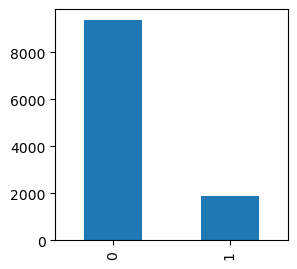

In [20]:
df['Churn'].value_counts().plot(kind='bar',figsize=(3,3))

# EDA

### Treating the Special Characters (Also Converting them to correct data form):

#### Tenure:

In [21]:
df.describe(include="all")["Tenure"]

count     11157.0
unique       38.0
top           1.0
freq       1351.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Tenure, dtype: float64

In [22]:
df.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [23]:
import re

# put the special characters in a list
special_char = ['"', '*', '/', '(', ')', ':', '\n', '#','No_info','@','$','+', '&']

special_char_escaped = list(map(re.escape, special_char))

In [24]:
df["Tenure"] = df["Tenure"].replace(special_char_escaped, 'nan', regex=True)

In [25]:
df.Tenure.unique()

array([4, 0, 2, 13, 11, 'nan', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [26]:
df["Tenure"] = df["Tenure"].astype("float")                                    # Cast the column into type float
df.describe()["Tenure"]

count    11041.000000
mean        11.025360
std         12.880333
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64

In [27]:
df.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [28]:
df.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [29]:
df.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [30]:
df.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [31]:
df.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [32]:
df.Login_device.unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [33]:
df["Account_user_count"] = df["Account_user_count"].replace(special_char_escaped, 'nan', regex=True)
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].replace(special_char_escaped, 'nan', regex=True)
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].replace(special_char_escaped, 'nan', regex=True)
df["rev_growth_yoy"] = df["rev_growth_yoy"].replace(special_char_escaped, 'nan', regex=True)
df["rev_per_month"] = df["rev_per_month"].replace(special_char_escaped, 'nan', regex=True)
df["Login_device"] = df["Login_device"].replace(special_char_escaped, 'nan', regex=True)

In [34]:
df["Account_user_count"] = df["Account_user_count"].astype("float") 
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].astype("float") 
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].astype("float") 
df["rev_growth_yoy"] = df["rev_growth_yoy"].astype("float") 
df["rev_per_month"] = df["rev_per_month"].astype("float")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11259 entries, 0 to 11258
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11259 non-null  int64  
 1   Tenure                   11041 non-null  float64
 2   City_Tier                11147 non-null  float64
 3   CC_Contacted_LY          11157 non-null  float64
 4   Payment                  11150 non-null  object 
 5   Gender                   11151 non-null  object 
 6   Service_Score            11161 non-null  float64
 7   Account_user_count       10815 non-null  float64
 8   account_segment          11162 non-null  object 
 9   CC_Agent_Score           11143 non-null  float64
 10  Marital_Status           11047 non-null  object 
 11  rev_per_month            10468 non-null  float64
 12  Complain_ly              10902 non-null  float64
 13  rev_growth_yoy           11256 non-null  float64
 14  coupon_used_for_paymen

#### Account_user_count:

In [36]:
df.describe(include="all")["Account_user_count"]

count     10815.000000
unique             NaN
top                NaN
freq               NaN
mean          3.693019
std           1.022894
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: Account_user_count, dtype: float64

In [37]:
df.Account_user_count.unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

#### coupon_used_for_payment:

In [38]:
df.describe(include="all")["coupon_used_for_payment"]

count     11256.000000
unique             NaN
top                NaN
freq               NaN
mean          1.790601
std           1.969637
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          16.000000
Name: coupon_used_for_payment, dtype: float64

In [39]:
df.coupon_used_for_payment.unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

#### Day_Since_CC_connect:

In [40]:
df.describe(include="all")["Day_Since_CC_connect"]

count     10901.000000
unique             NaN
top                NaN
freq               NaN
mean          4.633336
std           3.697773
min           0.000000
25%           2.000000
50%           3.000000
75%           8.000000
max          47.000000
Name: Day_Since_CC_connect, dtype: float64

In [41]:
df.Day_Since_CC_connect.unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

#### rev_growth_yoy:

In [42]:
df.describe(include="all")["rev_growth_yoy"]

count     11256.000000
unique             NaN
top                NaN
freq               NaN
mean         16.193674
std           3.757767
min           4.000000
25%          13.000000
50%          15.000000
75%          19.000000
max          28.000000
Name: rev_growth_yoy, dtype: float64

In [43]:
df.rev_growth_yoy.unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [44]:
df.rev_per_month.unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [45]:
df["rev_per_month"] = df["rev_per_month"].replace(special_char_escaped, 'nan', regex=True)

In [46]:
df["rev_per_month"] = df["rev_per_month"].astype("float") 

In [47]:
df.Login_device.unique()

array(['Mobile', 'Computer', nan], dtype=object)

### Checking for missing values:

In [48]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   471
Login_device               221
dtype: int64

In [49]:
df["cashback"] = df["cashback"].replace(special_char_escaped, 'nan', regex=True)

In [50]:
df["cashback"] = df["cashback"].astype("float")

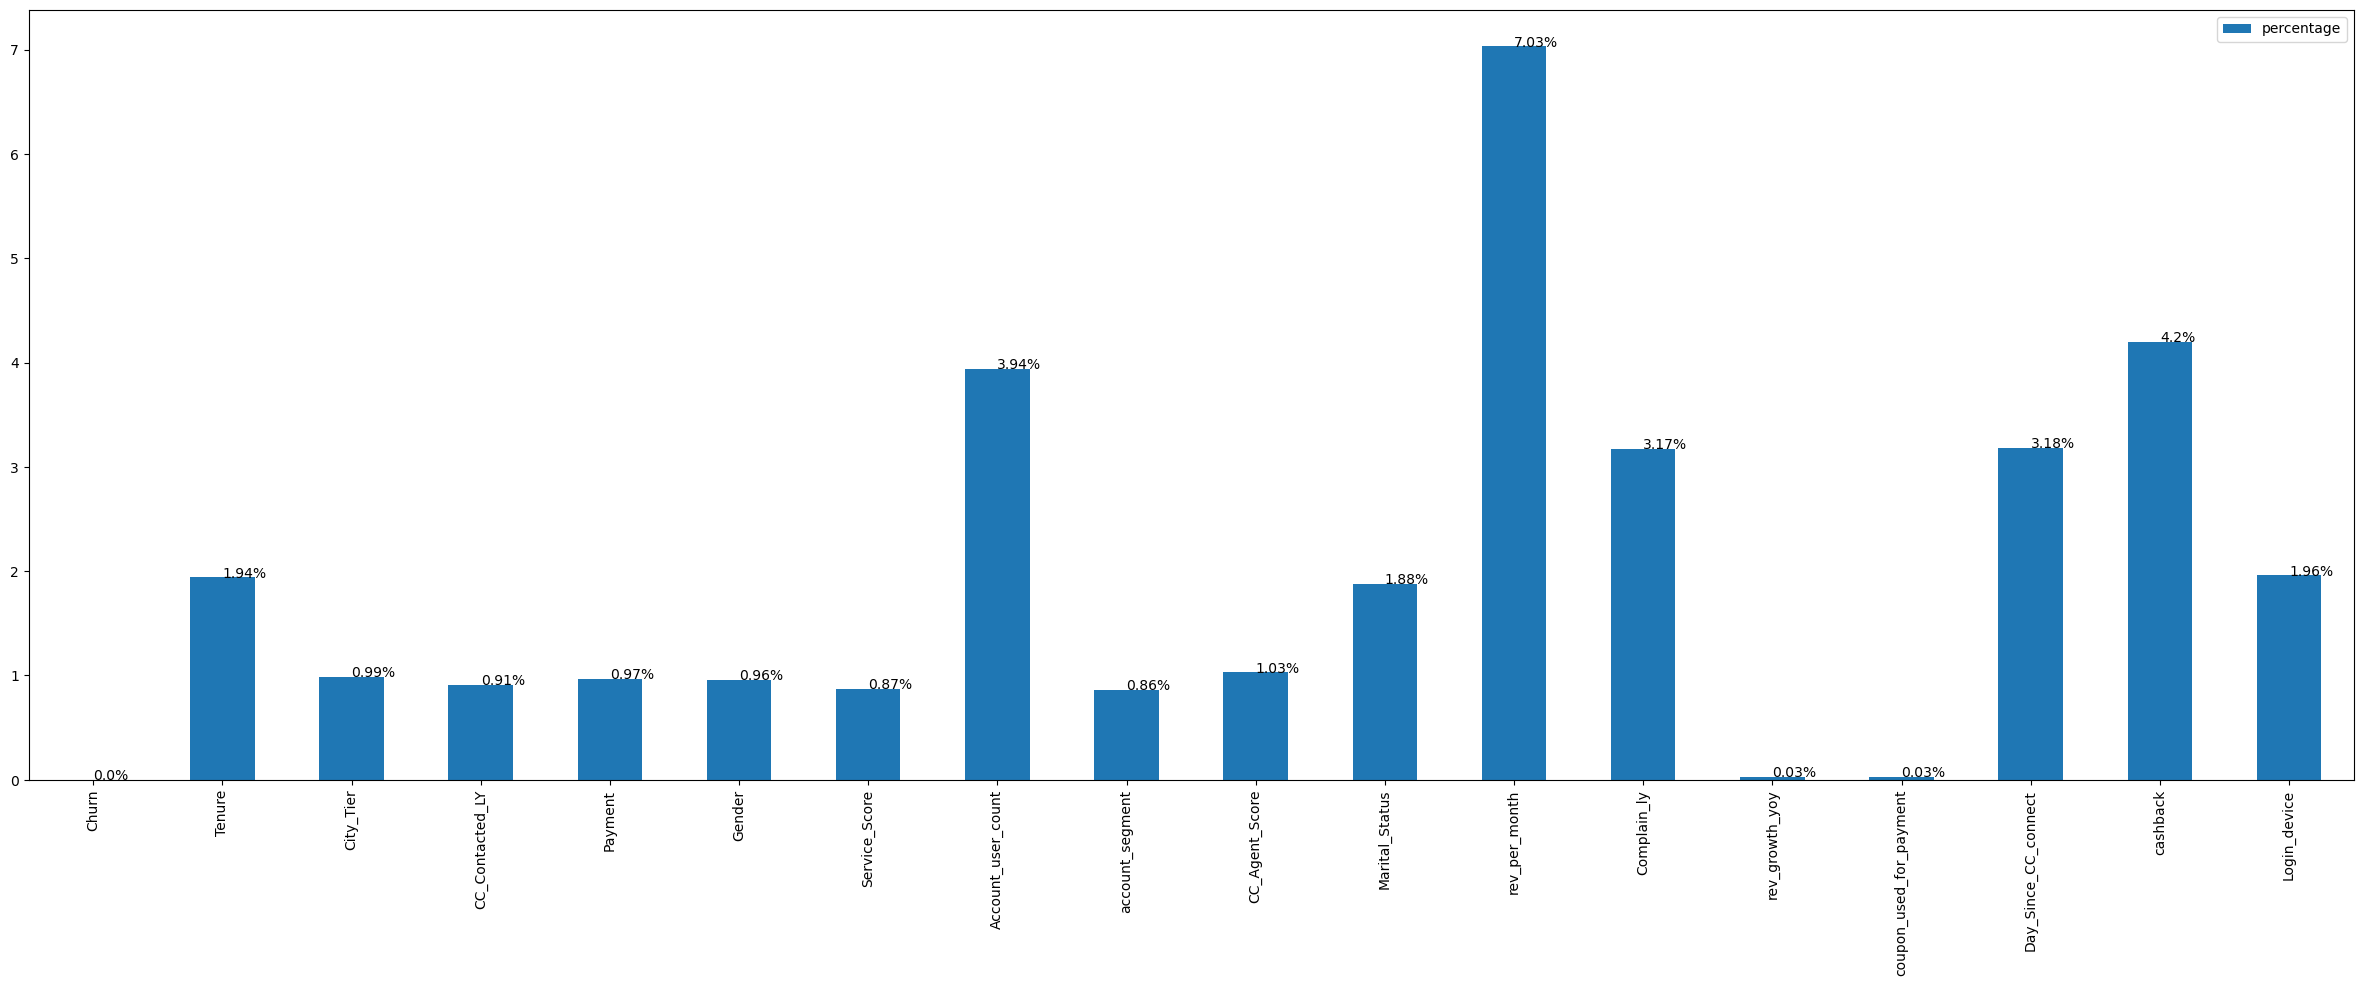

In [51]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

### Treating the Missing Values:

In [52]:
mode1=df["Payment"].mode().values[0]
mode2=df["Gender"].mode().values[0]
mode3=df["account_segment"].mode().values[0]
mode4=df["Marital_Status"].mode().values[0]
mode5=df["Login_device"].mode().values[0]

df["Payment"]=df["Payment"].replace(np.nan,mode1)
df["Gender"]=df["Gender"].replace(np.nan,mode2)
df["account_segment"]=df["account_segment"].replace(np.nan,mode3)
df["Marital_Status"]=df["Marital_Status"].replace(np.nan,mode4)
df["Login_device"]=df["Login_device"].replace(np.nan,mode5)

In [53]:
median1=df["Tenure"].median()
median2=df["Account_user_count"].median()
median3=df["rev_per_month"].median()
median4=df["rev_growth_yoy"].median()
median5=df["coupon_used_for_payment"].median()
median6=df["Day_Since_CC_connect"].median()
median7=df["CC_Contacted_LY"].median()
median8=df["Service_Score"].median()
median9=df["CC_Agent_Score"].median()
median10=df["Complain_ly"].median()
median11=df["City_Tier"].median()
median12=df["cashback"].median()

df["Tenure"].replace(np.nan,median1,inplace=True)
df["Account_user_count"].replace(np.nan,median2,inplace=True)
df["rev_per_month"].replace(np.nan,median3,inplace=True)
df["rev_growth_yoy"].replace(np.nan,median4,inplace=True)
df["coupon_used_for_payment"].replace(np.nan,median5,inplace=True)
df["Day_Since_CC_connect"].replace(np.nan,median6,inplace=True)
df["CC_Contacted_LY"].replace(np.nan,median7,inplace=True)
df["Service_Score"].replace(np.nan,median8,inplace=True)
df["CC_Agent_Score"].replace(np.nan,median9,inplace=True)
df["Complain_ly"].replace(np.nan,median10,inplace=True)
df["City_Tier"].replace(np.nan,median11,inplace=True)
df["cashback"].replace(np.nan,median12,inplace=True)

### Verifying the Missing Values treatment:

In [54]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

### Checking for duplicate records in the data:

In [55]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 297


Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
1347      1     0.0        1.0              8.0               UPI    Male   
1366      1     0.0        3.0             15.0        Debit Card    Male   
1395      1    11.0        1.0              6.0        Debit Card    Male   
1456      1     0.0        1.0             13.0        Debit Card    Male   
1485      1     0.0        1.0             15.0       Credit Card  Female   
...     ...     ...        ...              ...               ...     ...   
5584      0     9.0        1.0             16.0       Credit Card    Male   
5604      1    20.0        1.0             14.0  Cash on Delivery    Male   
5605      0    15.0        1.0             35.0        Debit Card  Female   
5611      0    12.0        3.0             17.0        Debit Card  Female   
5625      0    10.0        1.0             30.0       Credit Card    Male   

      Service_Score  Account_user_count account_segment  CC_Agent_Score  \
1347            3.0                 4.0    Regular Plus             3.0   
1366            2.0                 4.0           Super             5.0   
1395            3.0                 4.0             HNI             3.0   
1456            3.0                 5.0           Super             3.0   
1485            2.0                 3.0    Regular Plus             5.0   
...             ...                 ...             ...             ...   
5584            3.0                 4.0           Super             3.0   
5604            4.0                 4.0    Regular Plus             3.0   
5605            3.0                 5.0      Super Plus             4.0   
5611            4.0                 4.0           Super             1.0   
5625            3.0                 2.0           Super             1.0   

     Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
1347         Single            7.0          1.0            15.0   
1366         Single            8.0          0.0            23.0   
1395         Single           10.0          1.0            13.0   
1456         Single            2.0          1.0            24.0   
1485         Single            8.0          0.0            22.0   
...             ...            ...          ...             ...   
5584         Single            3.0          0.0            20.0   
5604        Married           10.0          0.0            12.0   
5605        Married            2.0          0.0            24.0   
5611        Married            3.0          0.0            12.0   
5625        Married            6.0          0.0            18.0   

      coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
1347                      0.0                   0.0    120.90       Mobile  
1366                      0.0                   3.0    134.07       Mobile  
1395                      0.0                   0.0    153.81       Mobile  
1456                      1.0                   6.0    160.74     Computer  
1485                      1.0                   4.0    142.00       Mobile  
...                       ...                   ...       ...          ...  
5584                      1.0                   9.0    175.98       Mobile  
5604                      7.0                   9.0    148.39       Mobile  
5605                      2.0                  11.0    260.70       Mobile  
5611                      1.0                  10.0    178.43       Mobile  
5625                      1.0                   4.0    150.71     Computer  

[297 rows x 18 columns]

### Dropping the Duplicates:

In [56]:
df.drop_duplicates(inplace=True) 

### Verifying the removal of Duplicates:

In [57]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Churn, Tenure, City_Tier, CC_Contacted_LY, Payment, Gender, Service_Score, Account_user_count, account_segment, CC_Agent_Score, Marital_Status, rev_per_month, Complain_ly, rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback, Login_device]
Index: []

### Univariate Analysis:

#### (a) City_Tier:

In [58]:
print('Range of values: ', df['City_Tier'].max()-df['City_Tier'].min())

Range of values:  2.0


In [59]:
# Central values:

print('Minimum Age: ', df['City_Tier'].min())
print('Maximum Age: ', df['City_Tier'].max())
print('Mean value: ', df['City_Tier'].mean())
print('Median value: ', df['City_Tier'].median())
print('Standard deviation: ', df['City_Tier'].std())
print('Null values: ', df['City_Tier'].isnull().any())

Minimum Age:  1.0
Maximum Age:  3.0
Mean value:  1.6479656996898375
Median value:  1.0
Standard deviation:  0.9135868686766101
Null values:  False


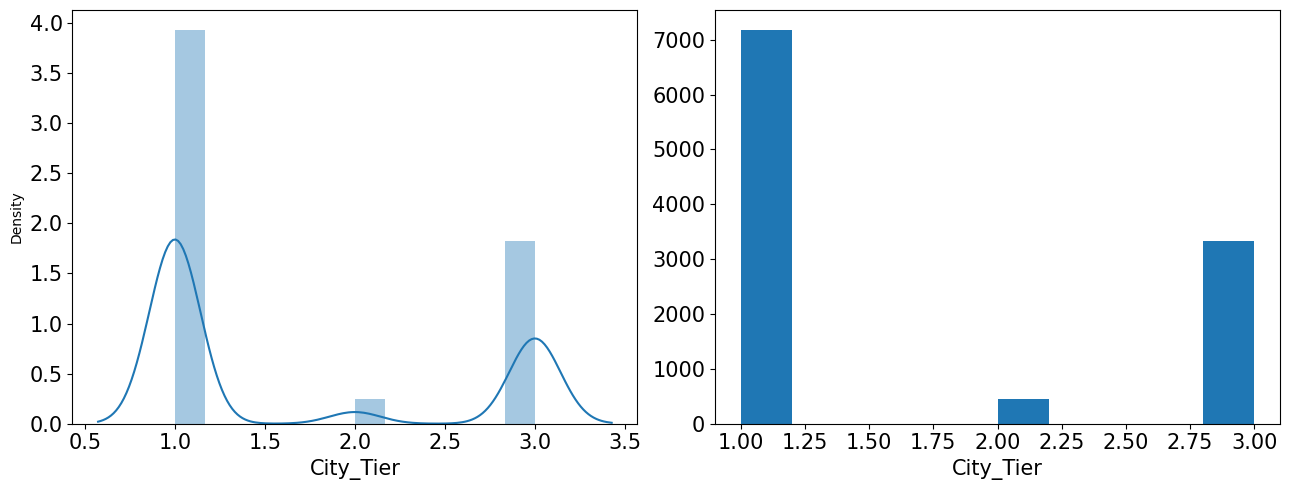

In [60]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['City_Tier'],ax=ax2)
ax2.set_xlabel('City_Tier', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['City_Tier'])
ax3.set_xlabel('City_Tier', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (b) CC_Contacted_LY:

In [61]:
print('Range of values: ', df['CC_Contacted_LY'].max()-df['CC_Contacted_LY'].min())

Range of values:  128.0


In [62]:
# Central values:

print('Minimum Age: ', df['CC_Contacted_LY'].min())
print('Maximum Age: ', df['CC_Contacted_LY'].max())
print('Mean value: ', df['CC_Contacted_LY'].mean())
print('Median value: ', df['CC_Contacted_LY'].median())
print('Standard deviation: ', df['CC_Contacted_LY'].std())
print('Null values: ', df['CC_Contacted_LY'].isnull().any())

Minimum Age:  4.0
Maximum Age:  132.0
Mean value:  17.875843824119688
Median value:  16.0
Standard deviation:  8.834590968307166
Null values:  False


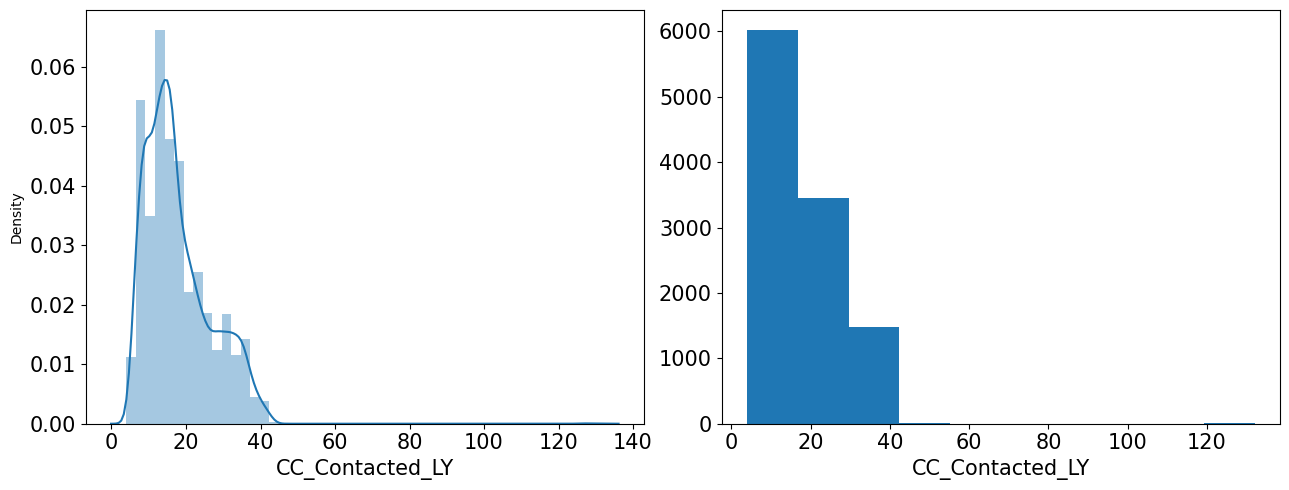

In [63]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['CC_Contacted_LY'],ax=ax2)
ax2.set_xlabel('CC_Contacted_LY', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['CC_Contacted_LY'])
ax3.set_xlabel('CC_Contacted_LY', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (c) Service_Score:

In [64]:
print('Range of values: ', df['Service_Score'].max()-df['Service_Score'].min())

Range of values:  5.0


In [65]:
# Central values:

print('Minimum Age: ', df['Service_Score'].min())
print('Maximum Age: ', df['Service_Score'].max())
print('Mean value: ', df['Service_Score'].mean())
print('Median value: ', df['Service_Score'].median())
print('Standard deviation: ', df['Service_Score'].std())
print('Null values: ', df['Service_Score'].isnull().any())

Minimum Age:  0.0
Maximum Age:  5.0
Mean value:  2.9015690567414705
Median value:  3.0
Standard deviation:  0.7231993745157886
Null values:  False


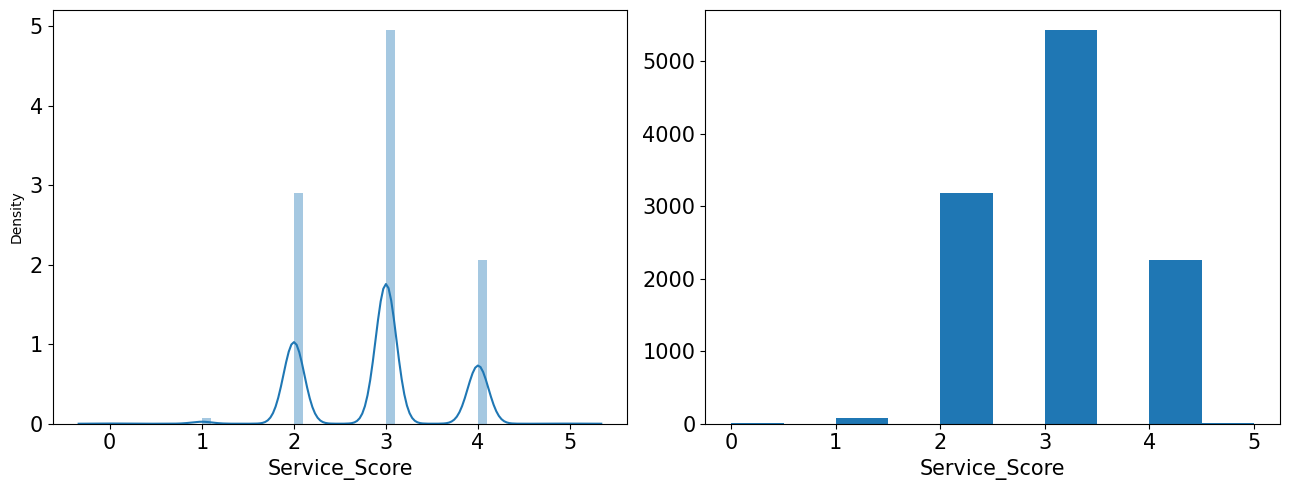

In [66]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Service_Score'],ax=ax2)
ax2.set_xlabel('Service_Score', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Service_Score'])
ax3.set_xlabel('Service_Score', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (d) CC_Agent_Score:

In [67]:
print('Range of values: ', df['CC_Agent_Score'].max()-df['CC_Agent_Score'].min())

Range of values:  4.0


In [68]:
# Central values:

print('Minimum Age: ', df['CC_Agent_Score'].min())
print('Maximum Age: ', df['CC_Agent_Score'].max())
print('Mean value: ', df['CC_Agent_Score'].mean())
print('Median value: ', df['CC_Agent_Score'].median())
print('Standard deviation: ', df['CC_Agent_Score'].std())
print('Null values: ', df['CC_Agent_Score'].isnull().any())

Minimum Age:  1.0
Maximum Age:  5.0
Mean value:  3.0551906586389346
Median value:  3.0
Standard deviation:  1.3730236113703251
Null values:  False


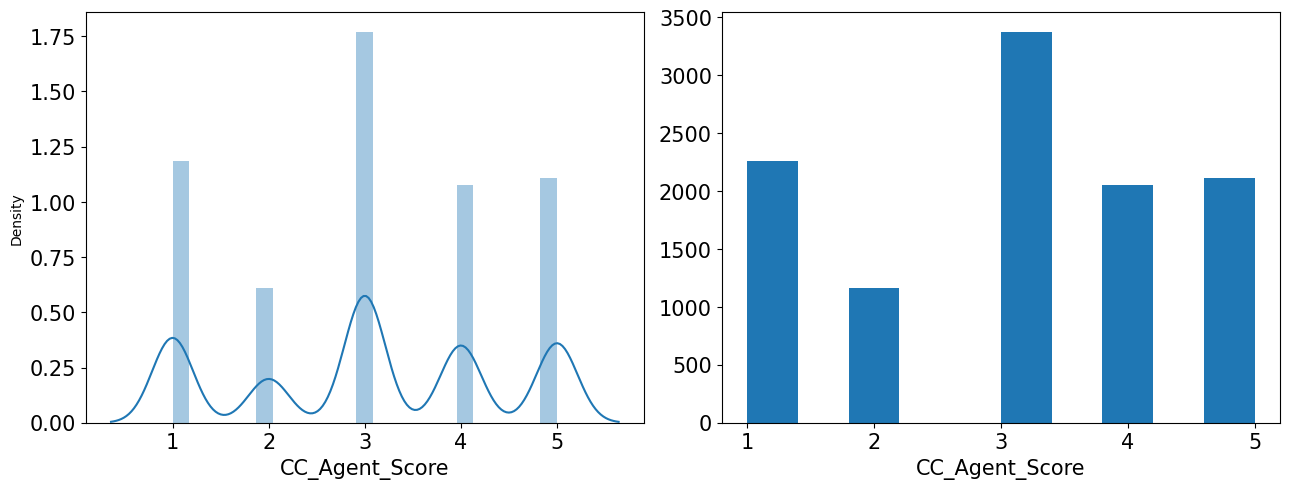

In [69]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['CC_Agent_Score'],ax=ax2)
ax2.set_xlabel('CC_Agent_Score', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['CC_Agent_Score'])
ax3.set_xlabel('CC_Agent_Score', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (e) Complain_ly:

In [70]:
print('Range of values: ', df['Complain_ly'].max()-df['Complain_ly'].min())

Range of values:  1.0


In [71]:
# Central values:

print('Minimum Age: ', df['Complain_ly'].min())
print('Maximum Age: ', df['Complain_ly'].max())
print('Mean value: ', df['Complain_ly'].mean())
print('Median value: ', df['Complain_ly'].median())
print('Standard deviation: ', df['Complain_ly'].std())
print('Null values: ', df['Complain_ly'].isnull().any())

Minimum Age:  0.0
Maximum Age:  1.0
Mean value:  0.2765006385696041
Median value:  0.0
Standard deviation:  0.4472876997335723
Null values:  False


In [72]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Complain_ly'],ax=ax2)
ax2.set_xlabel('Complain_ly', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Complain_ly'])
ax3.set_xlabel('Complain_ly', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (f) Churn:

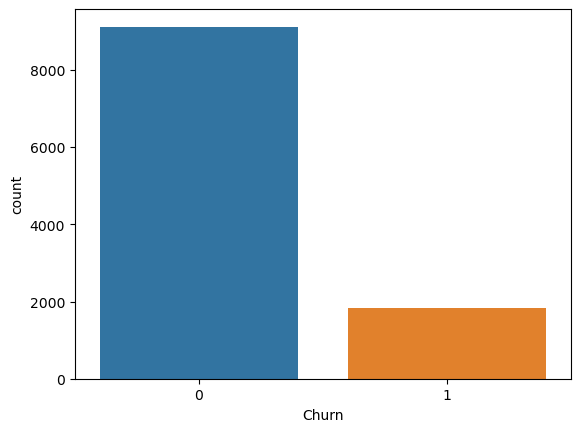

In [73]:
sns.countplot(data = df, x = 'Churn')                                                  ## count plot
plt.show()

#### (g) Tenure:

In [74]:
print('Range of values: ', df['Tenure'].max()-df['Tenure'].min())

Range of values:  99.0


In [75]:
# Central values:

print('Minimum Age: ', df['Tenure'].min())
print('Maximum Age: ', df['Tenure'].max())
print('Mean value: ', df['Tenure'].mean())
print('Median value: ', df['Tenure'].median())
print('Standard deviation: ', df['Tenure'].std())
print('Null values: ', df['Tenure'].isnull().any())


Minimum Age:  0.0
Maximum Age:  99.0
Mean value:  11.034665207079
Median value:  9.0
Standard deviation:  12.861911880832286
Null values:  False


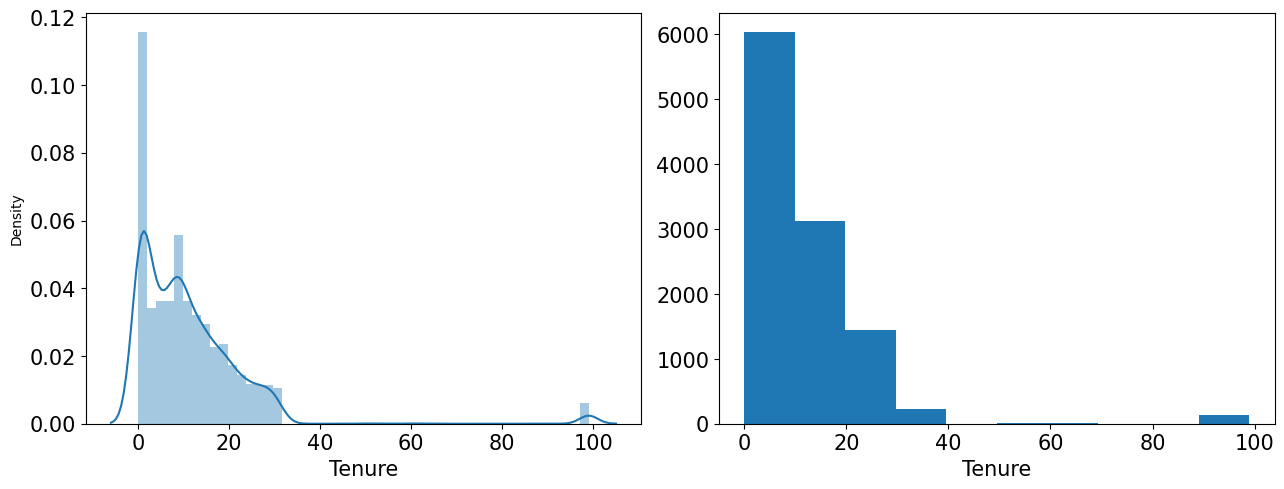

In [76]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Tenure'],ax=ax2)
ax2.set_xlabel('Tenure', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Tenure'])
ax3.set_xlabel('Tenure', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (h) Payment:

In [77]:
sns.countplot(data = df, x = 'Payment')                                                  ## count plot
plt.show()

#### (i) Gender:

In [78]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [79]:
sns.countplot(data = df, x = 'Gender')                                                  ## count plot
plt.show()

#### (j) Account_user_count:

In [80]:
print('Range of values: ', df['Account_user_count'].max()-df['Account_user_count'].min())

Range of values:  5.0


In [81]:
# Central values:

print('Minimum Age: ', df['Account_user_count'].min())
print('Maximum Age: ', df['Account_user_count'].max())
print('Mean value: ', df['Account_user_count'].mean())
print('Median value: ', df['Account_user_count'].median())
print('Standard deviation: ', df['Account_user_count'].std())
print('Null values: ', df['Account_user_count'].isnull().any())

Minimum Age:  1.0
Maximum Age:  6.0
Mean value:  3.7049808429118776
Median value:  4.0
Standard deviation:  1.0053187650478648
Null values:  False


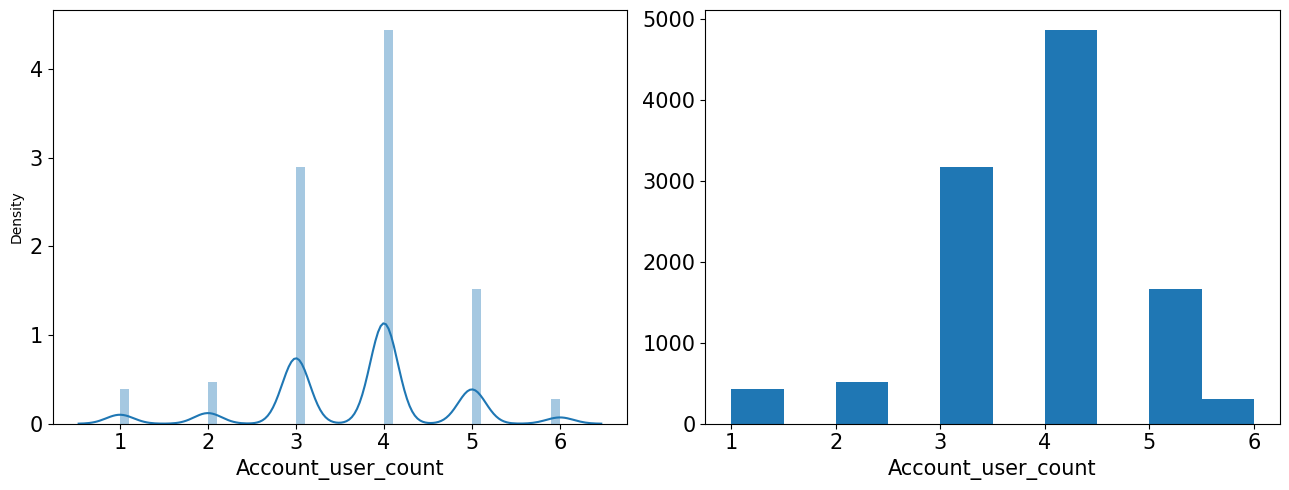

In [82]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Account_user_count'],ax=ax2)
ax2.set_xlabel('Account_user_count', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Account_user_count'])
ax3.set_xlabel('Account_user_count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (k) account_segment:

In [83]:
df["account_segment"] = df["account_segment"].replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [84]:
sns.countplot(data = df, x = 'account_segment')                                                  ## count plot
plt.show()

#### (l) CC_Agent_Score:

In [85]:
sns.countplot(data = df, x = 'CC_Agent_Score')                                                  ## count plot
plt.show()

#### (m) Marital_Status:

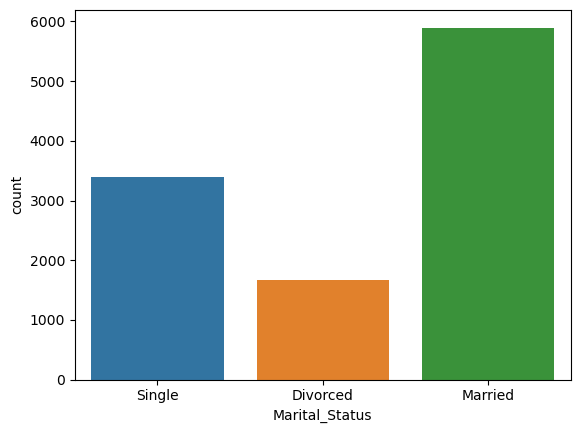

In [86]:
sns.countplot(data = df, x = 'Marital_Status')                                                  ## count plot
plt.show()

#### (n) coupon_used_for_payment:

In [87]:
print('Range of values: ', df['coupon_used_for_payment'].max()-df['coupon_used_for_payment'].min())

Range of values:  16.0


In [88]:
# Central values:

print('Minimum Age: ', df['coupon_used_for_payment'].min())
print('Maximum Age: ', df['coupon_used_for_payment'].max())
print('Mean value: ', df['coupon_used_for_payment'].mean())
print('Median value: ', df['coupon_used_for_payment'].median())
print('Standard deviation: ', df['coupon_used_for_payment'].std())
print('Null values: ', df['coupon_used_for_payment'].isnull().any())

Minimum Age:  0.0
Maximum Age:  16.0
Mean value:  1.802408319649699
Median value:  1.0
Standard deviation:  1.9793666162371664
Null values:  False


In [89]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['coupon_used_for_payment'],ax=ax2)
ax2.set_xlabel('coupon_used_for_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['coupon_used_for_payment'])
ax3.set_xlabel('coupon_used_for_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (o) Day_Since_CC_connect:

In [90]:
print('Range of values: ', df['Day_Since_CC_connect'].max()-df['Day_Since_CC_connect'].min())

Range of values:  47.0


In [91]:
# Central values:

print('Minimum Age: ', df['Day_Since_CC_connect'].min())
print('Maximum Age: ', df['Day_Since_CC_connect'].max())
print('Mean value: ', df['Day_Since_CC_connect'].mean())
print('Median value: ', df['Day_Since_CC_connect'].median())
print('Standard deviation: ', df['Day_Since_CC_connect'].std())
print('Null values: ', df['Day_Since_CC_connect'].isnull().any())

Minimum Age:  0.0
Maximum Age:  47.0
Mean value:  4.596059113300493
Median value:  3.0
Standard deviation:  3.65314088832343
Null values:  False


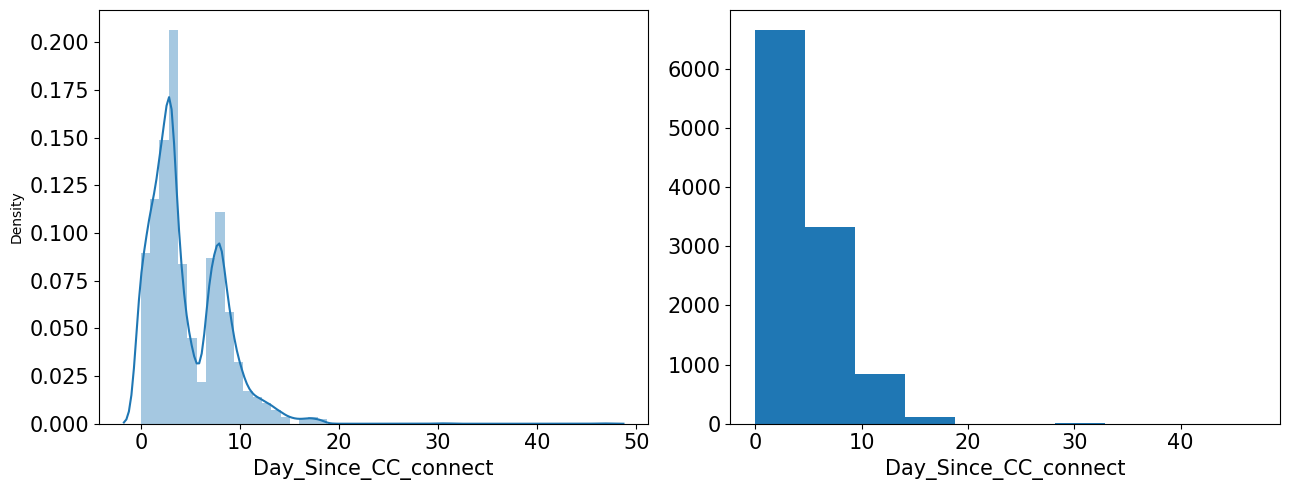

In [92]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Day_Since_CC_connect'],ax=ax2)
ax2.set_xlabel('Day_Since_CC_connect', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Day_Since_CC_connect'])
ax3.set_xlabel('Day_Since_CC_connect', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (p) Login_device:

In [93]:
sns.countplot(data = df, x = 'Login_device')                                                  ## count plot
plt.show()

#### (q) rev_growth_yoy:

In [94]:
print('Range of values: ', df['rev_growth_yoy'].max()-df['rev_growth_yoy'].min())

Range of values:  24.0


In [95]:
# Central values:

print('Minimum Age: ', df['rev_growth_yoy'].min())
print('Maximum Age: ', df['rev_growth_yoy'].max())
print('Mean value: ', df['rev_growth_yoy'].mean())
print('Median value: ', df['rev_growth_yoy'].median())
print('Standard deviation: ', df['rev_growth_yoy'].std())
print('Null values: ', df['rev_growth_yoy'].isnull().any())

Minimum Age:  4.0
Maximum Age:  28.0
Mean value:  16.206166757890895
Median value:  15.0
Standard deviation:  3.760094986531903
Null values:  False


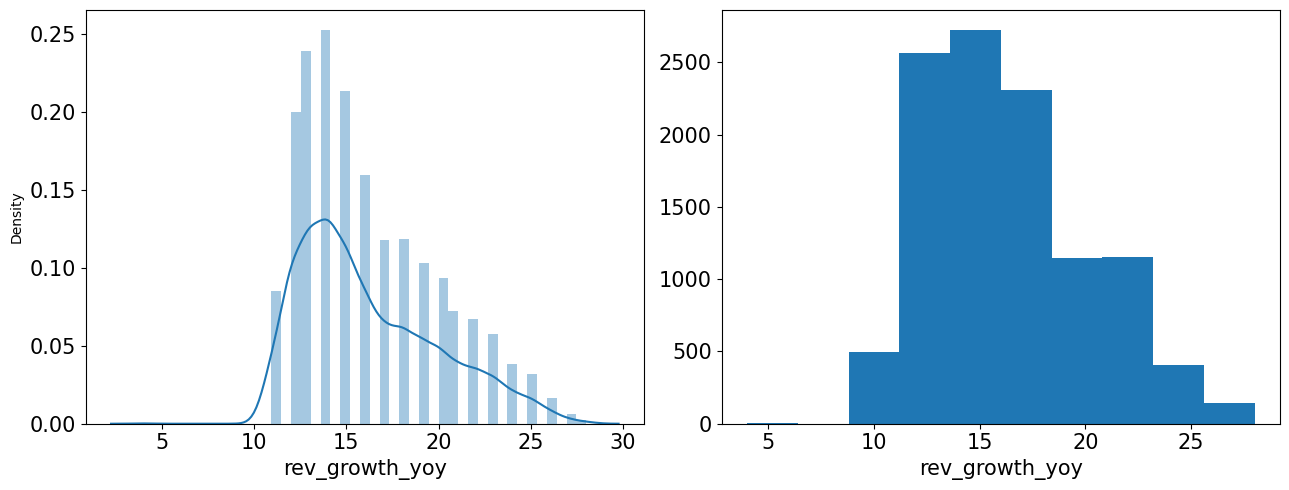

In [96]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['rev_growth_yoy'],ax=ax2)
ax2.set_xlabel('rev_growth_yoy', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['rev_growth_yoy'])
ax3.set_xlabel('rev_growth_yoy', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (r) cashback:

In [97]:
print('Range of values: ', df['cashback'].max()-df['cashback'].min())

Range of values:  1997.0


In [98]:
# Central values:

print('Minimum Age: ', df['cashback'].min())
print('Maximum Age: ', df['cashback'].max())
print('Mean value: ', df['cashback'].mean())
print('Median value: ', df['cashback'].median())
print('Standard deviation: ', df['cashback'].std())
print('Null values: ', df['cashback'].isnull().any())

Minimum Age:  0.0
Maximum Age:  1997.0
Mean value:  195.63835933224206
Median value:  165.245
Standard deviation:  177.13819367707055
Null values:  False


In [99]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['cashback'],ax=ax2)
ax2.set_xlabel('cashback', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cashback'])
ax3.set_xlabel('cashback', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Bivariate Analysis:

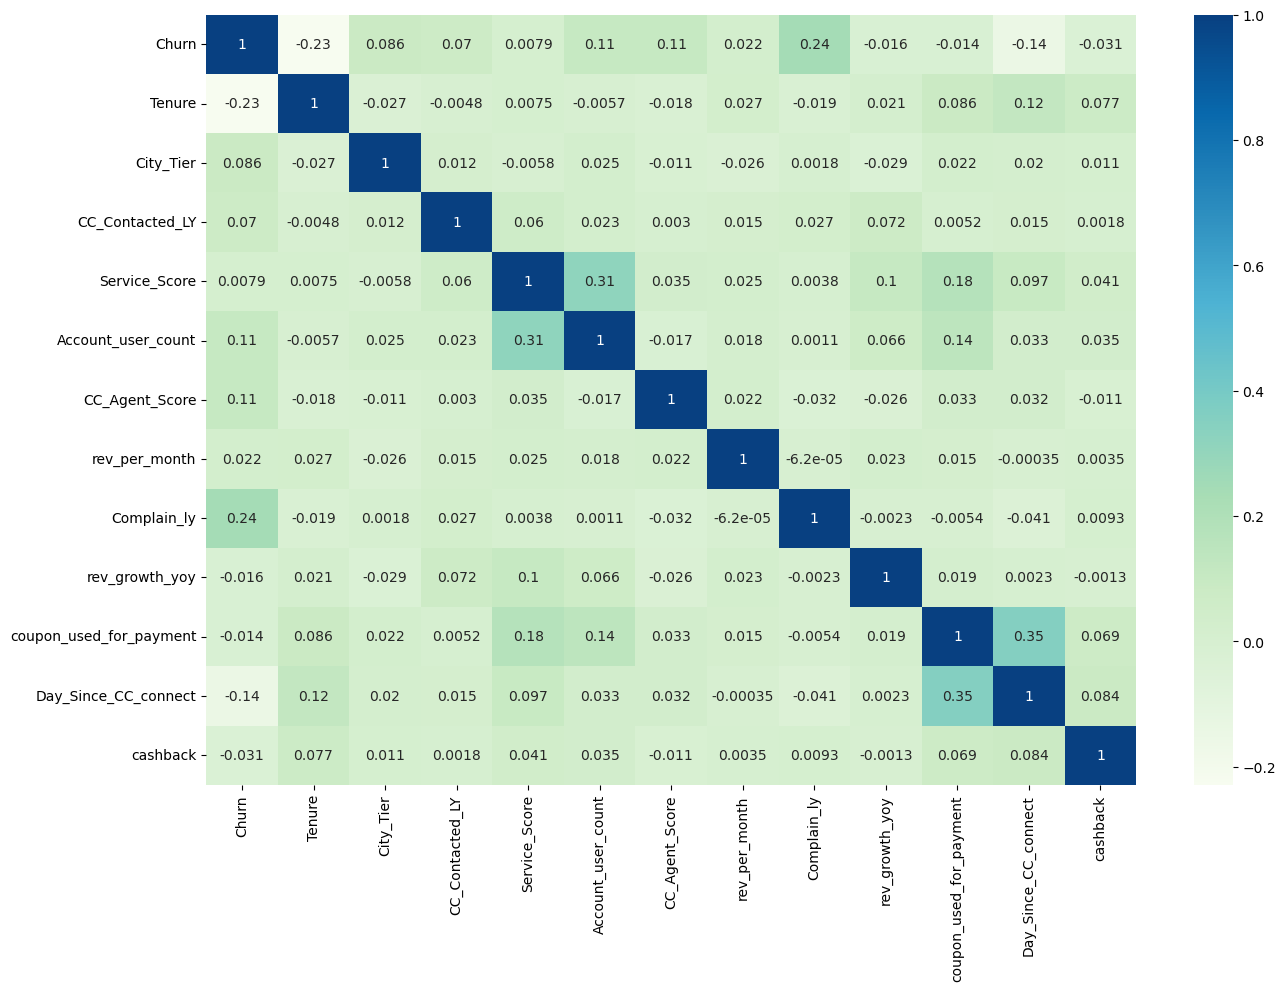

In [100]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), cmap = 'GnBu', annot = True)

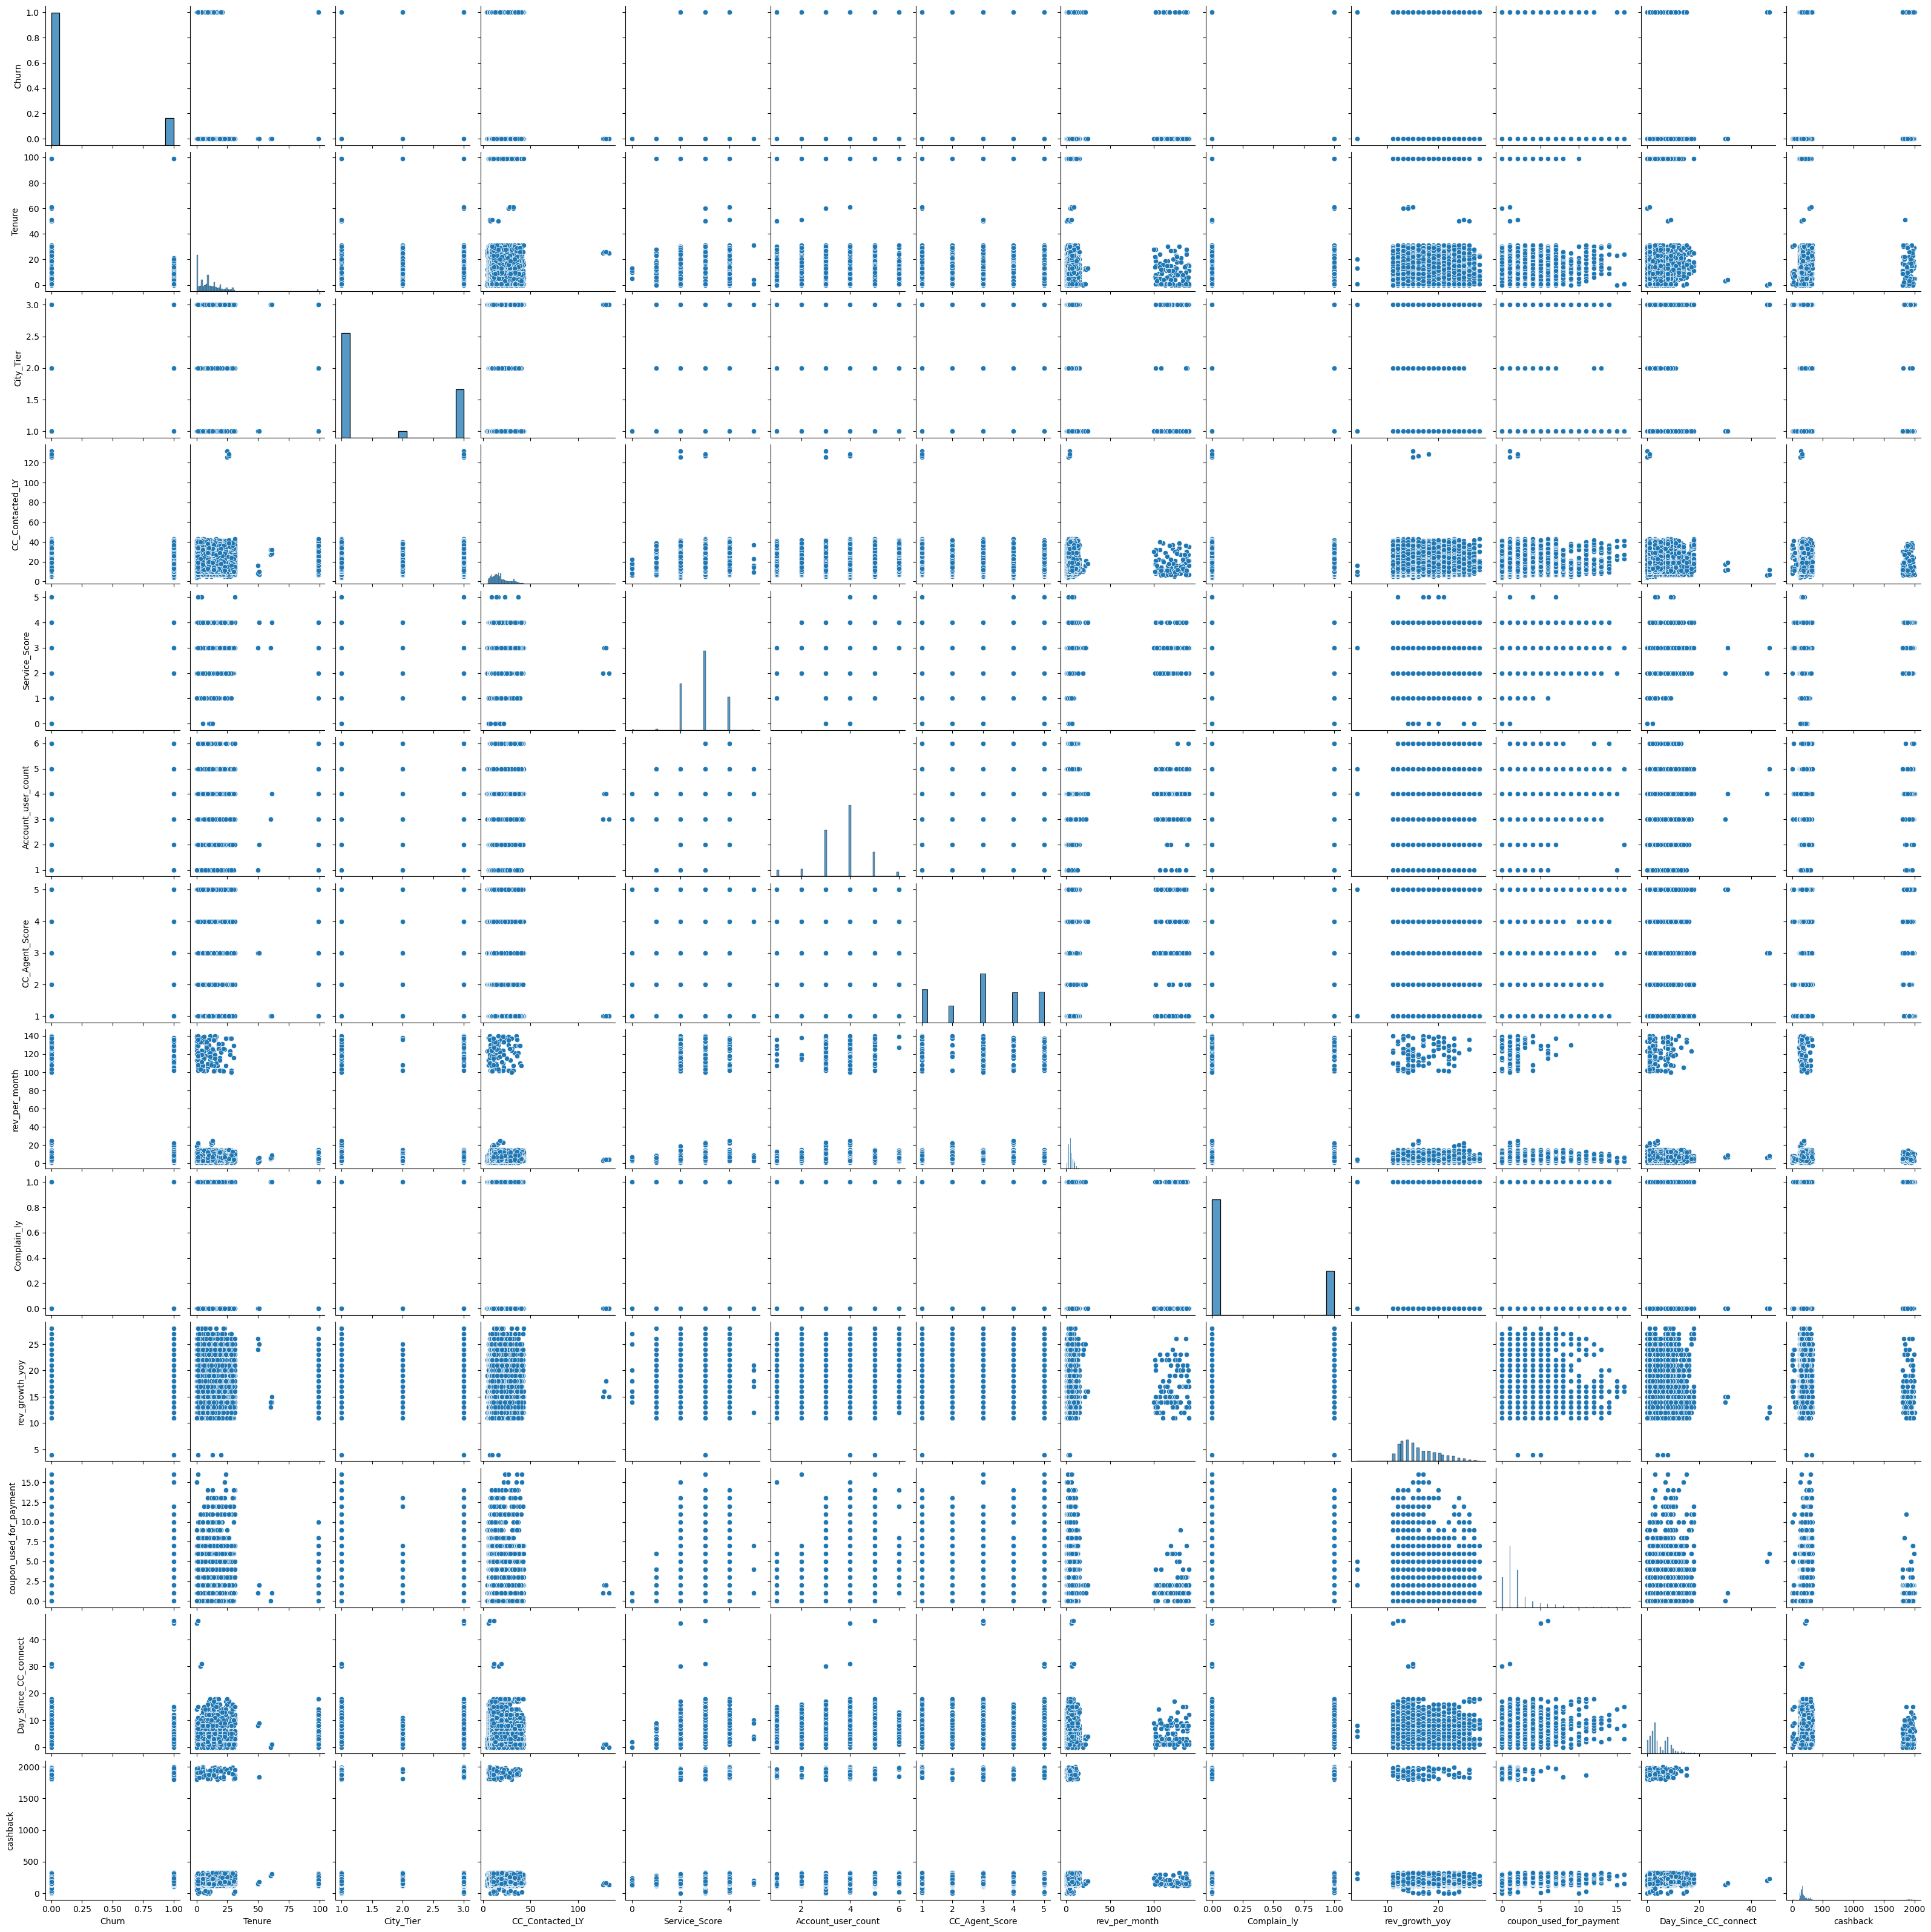

In [101]:
sns.pairplot(df)

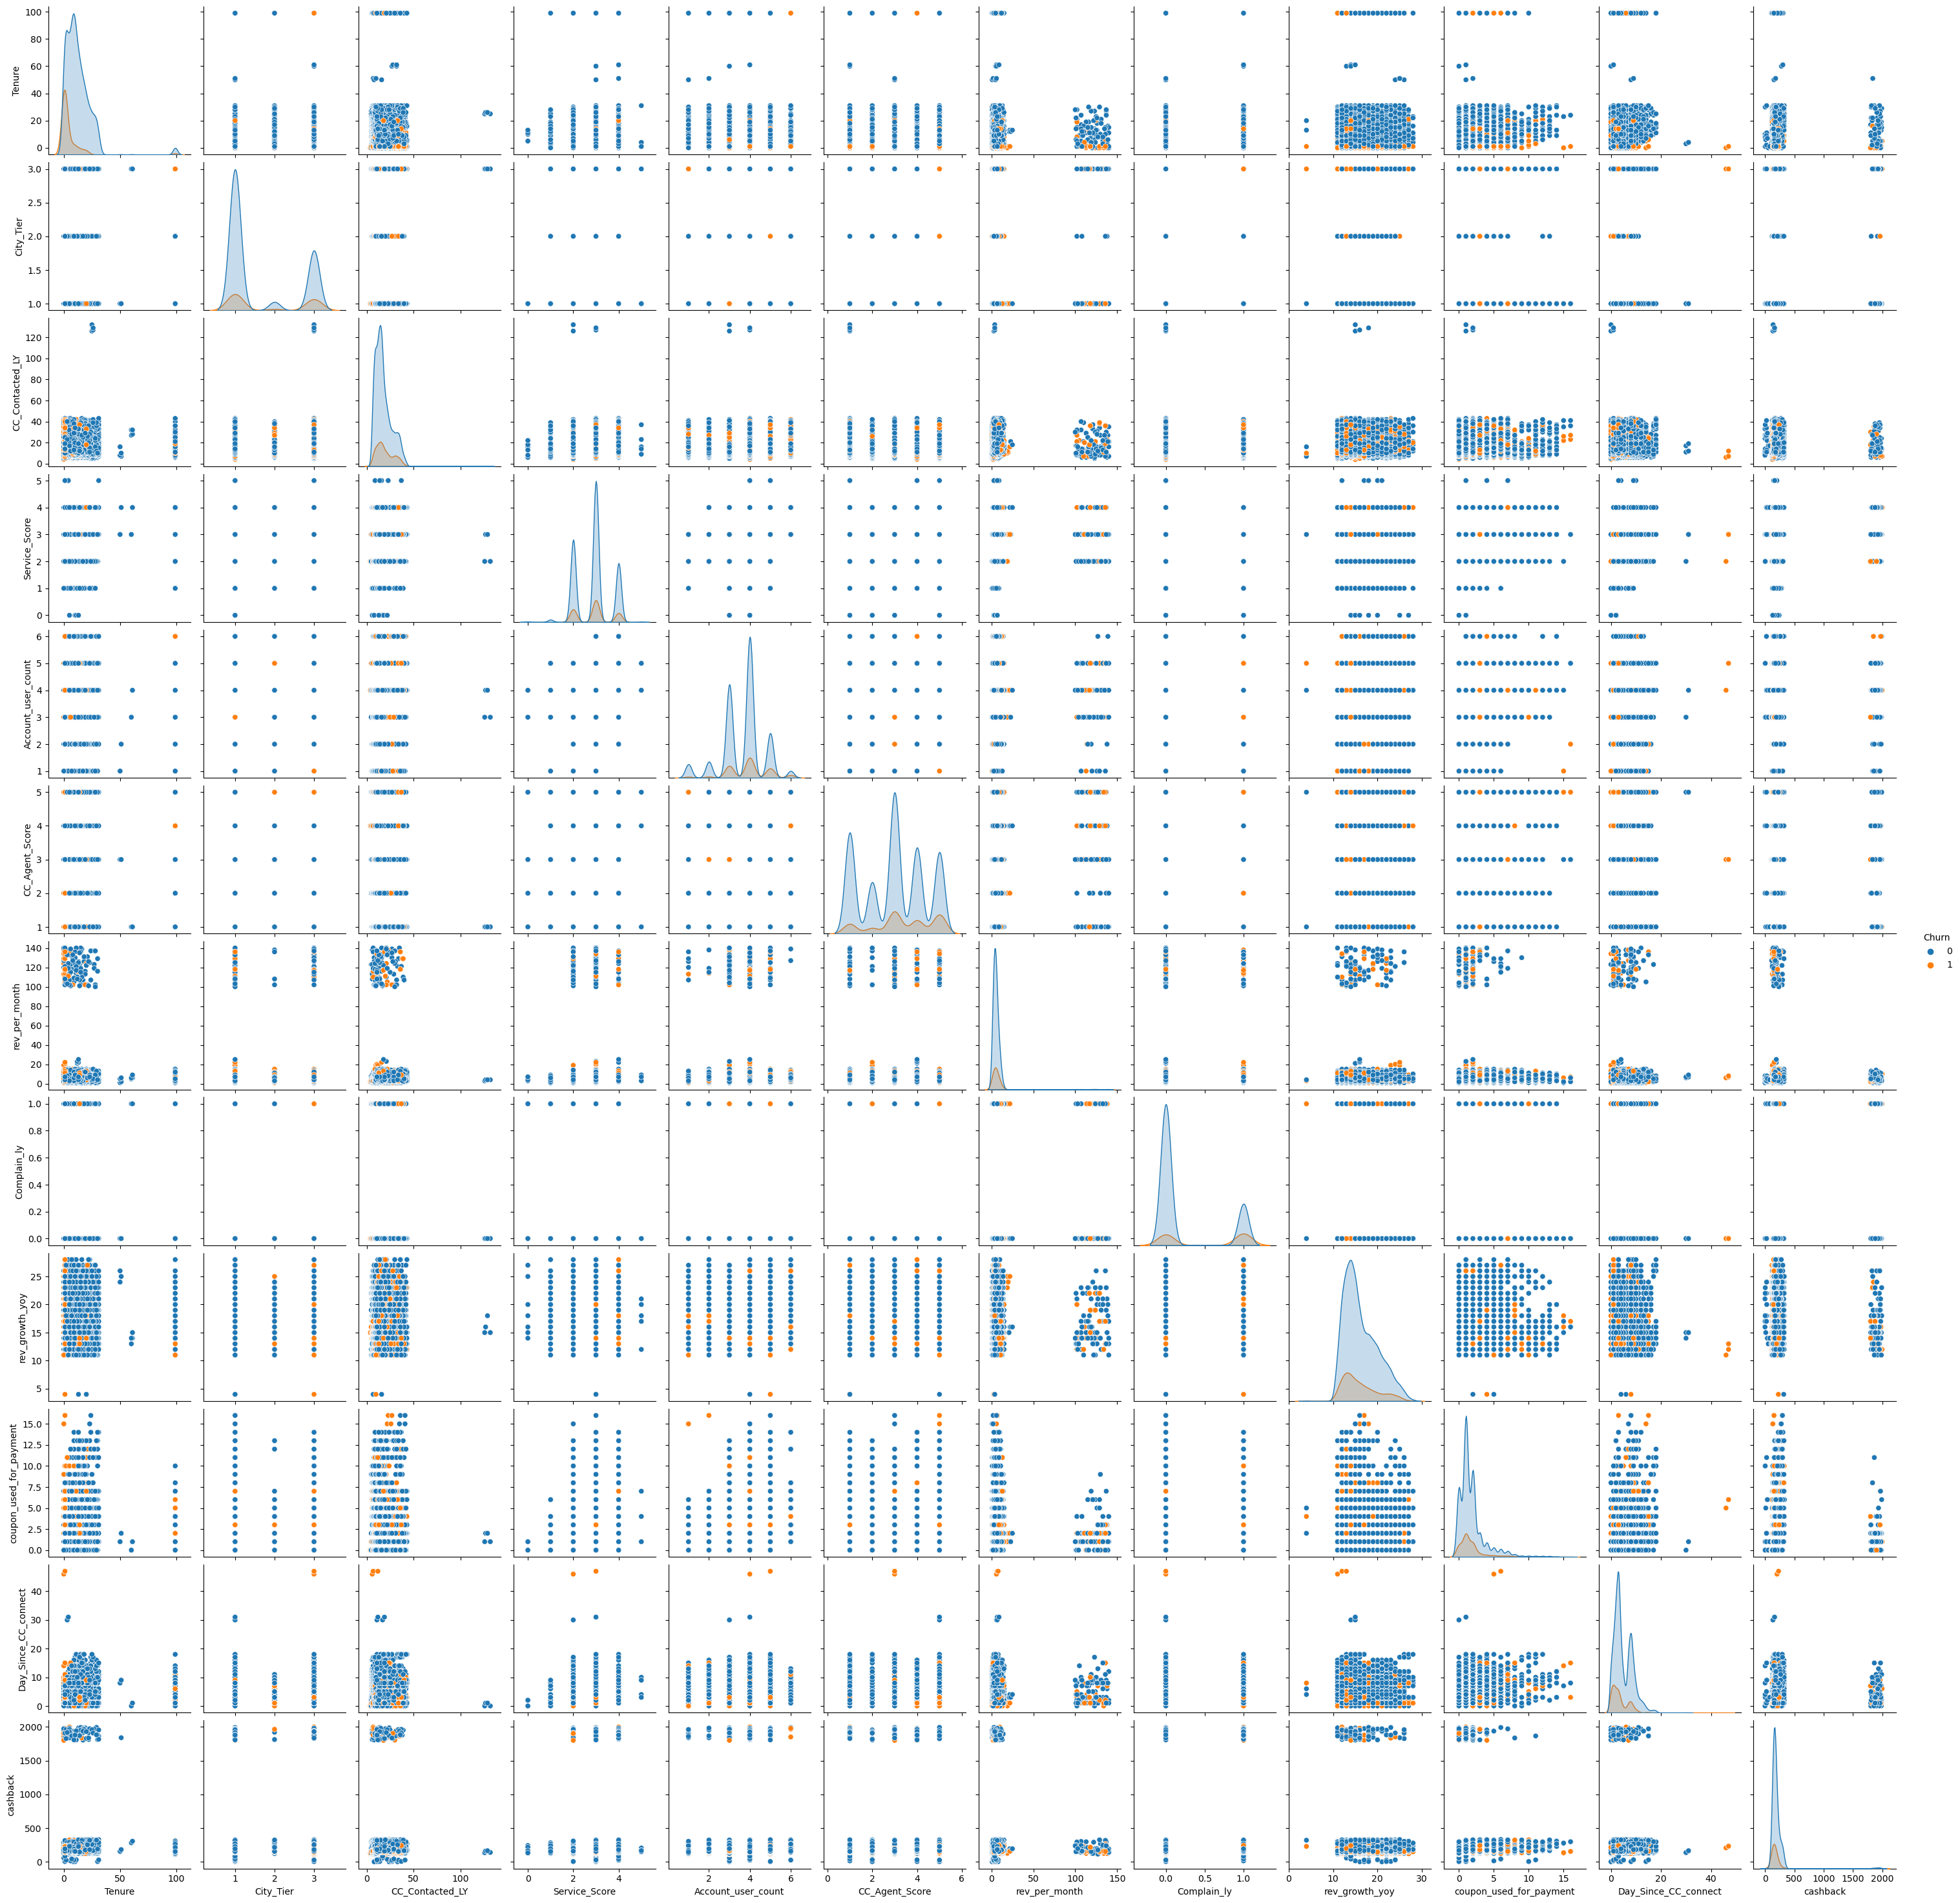

In [102]:
sns.pairplot(df, hue='Churn')

In [103]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Tenure'], jitter=True) 
plt.show()

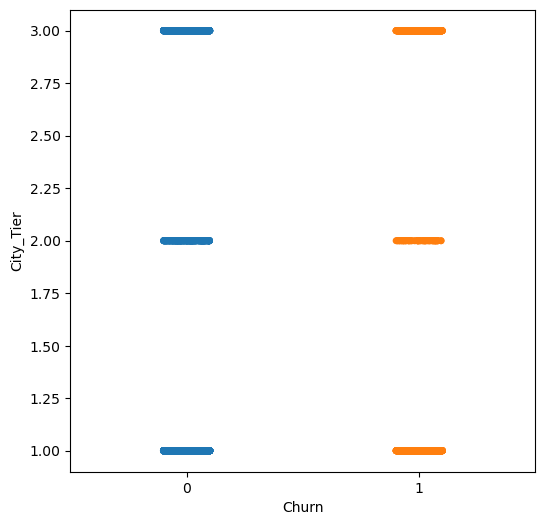

In [104]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['City_Tier'], jitter=True) 
plt.show()

In [105]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['CC_Contacted_LY'], jitter=True) 
plt.show()

In [106]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Payment'], jitter=True) 
plt.show()

In [107]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Gender'], jitter=True) 
plt.show()

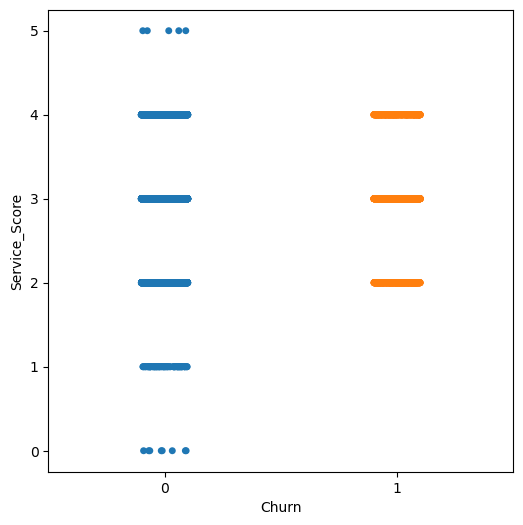

In [108]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Service_Score'], jitter=True) 
plt.show()

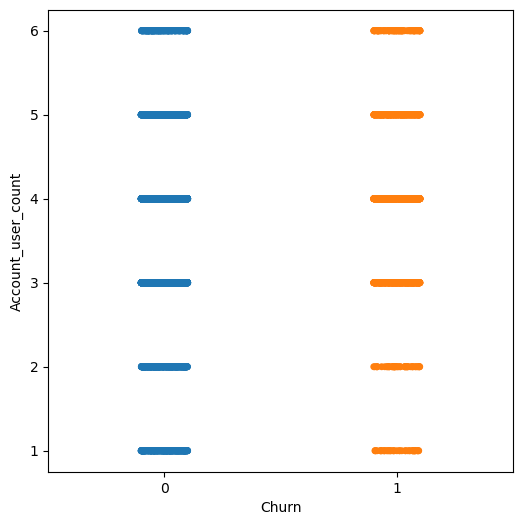

In [109]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Account_user_count'], jitter=True) 
plt.show()

In [110]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['CC_Agent_Score'], jitter=True) 
plt.show()

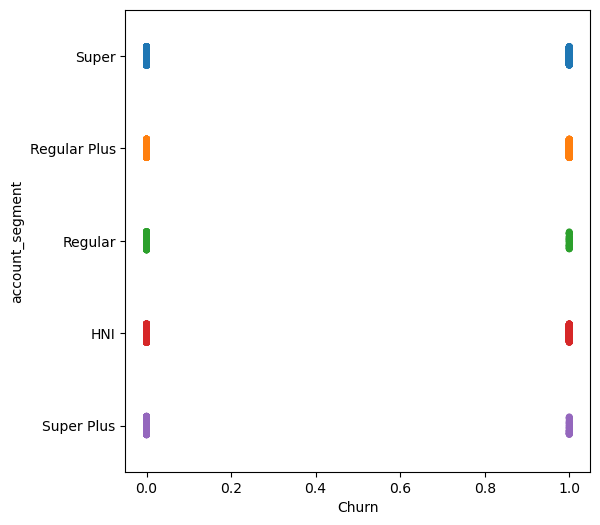

In [111]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['account_segment'], jitter=True) 
plt.show()

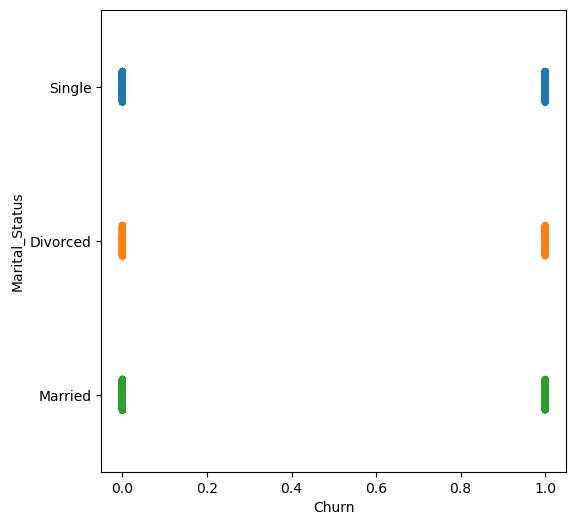

In [112]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Marital_Status'], jitter=True) 
plt.show()

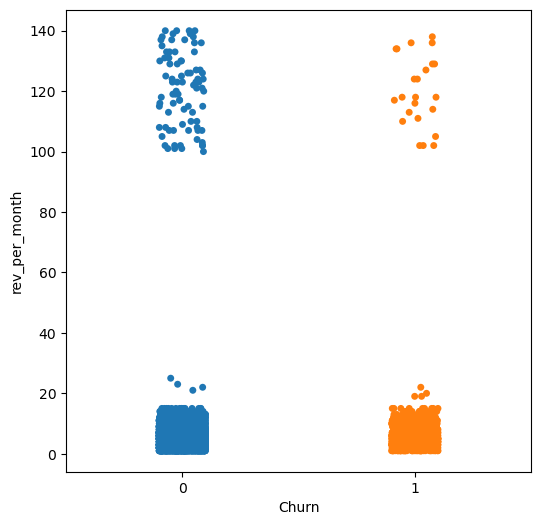

In [113]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['rev_per_month'], jitter=True) 
plt.show()

In [114]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Complain_ly'], jitter=True) 
plt.show()

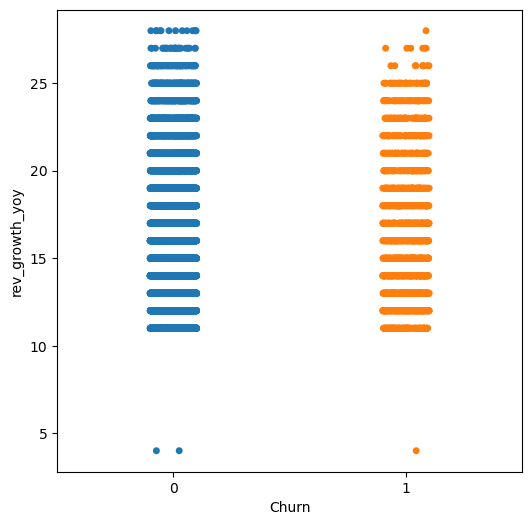

In [115]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['rev_growth_yoy'], jitter=True) 
plt.show()

In [116]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['coupon_used_for_payment'], jitter=True) 
plt.show()

In [117]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Day_Since_CC_connect'], jitter=True) 
plt.show()

In [118]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['cashback'], jitter=True) 
plt.show()

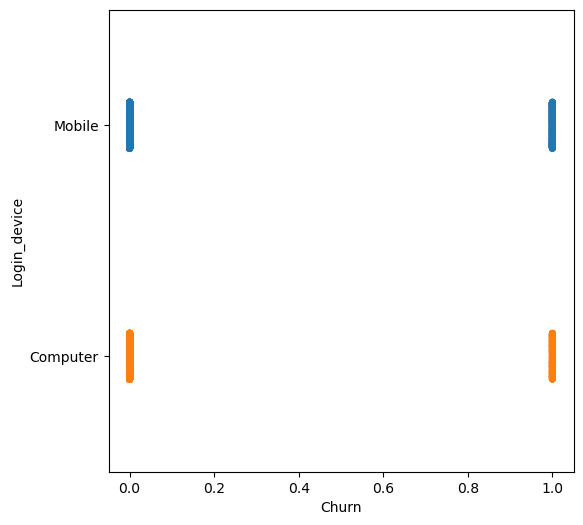

In [119]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Login_device'], jitter=True) 
plt.show()

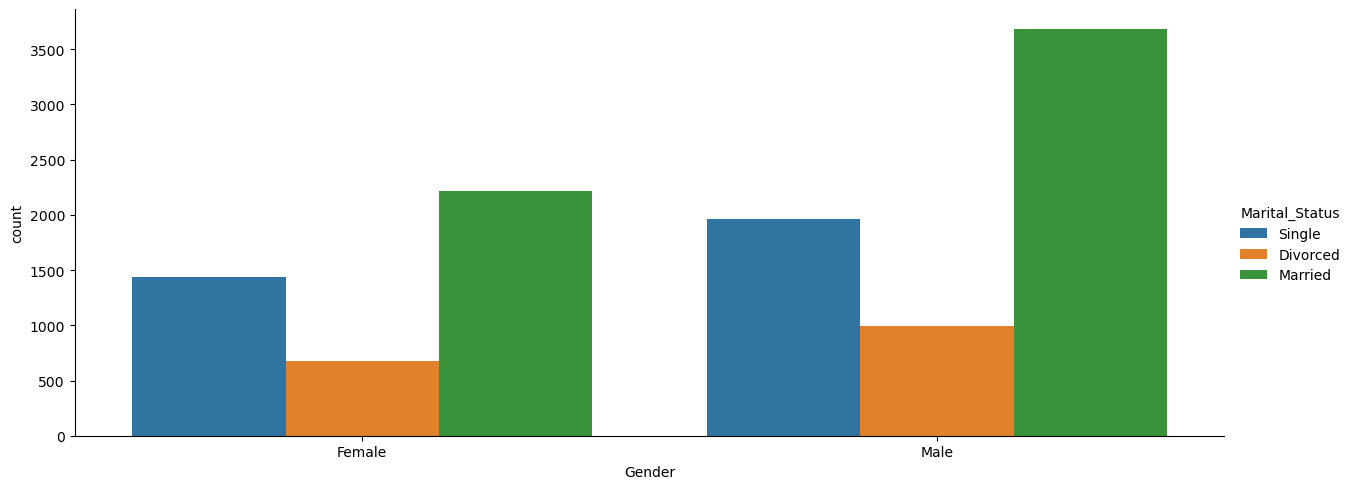

In [120]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

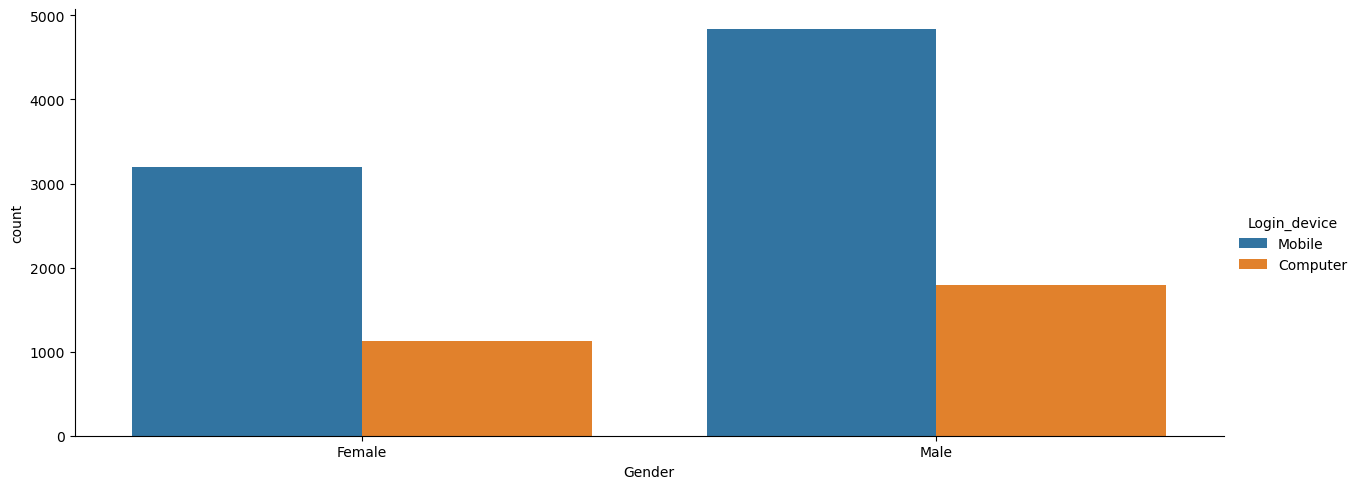

In [121]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Login_device')
plt.show()

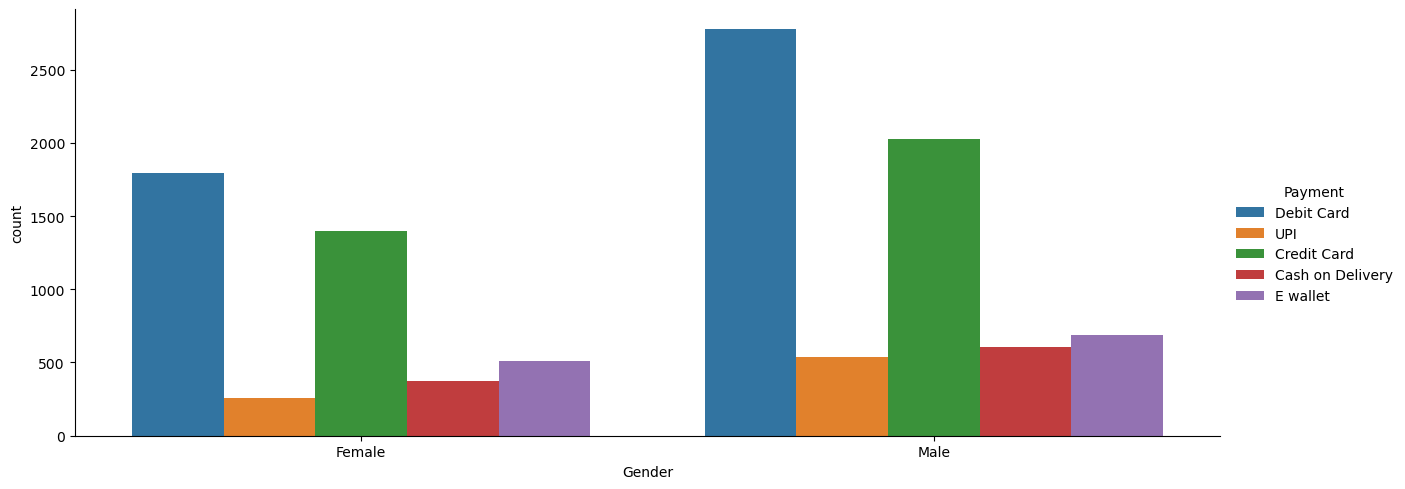

In [122]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Payment')
plt.show()

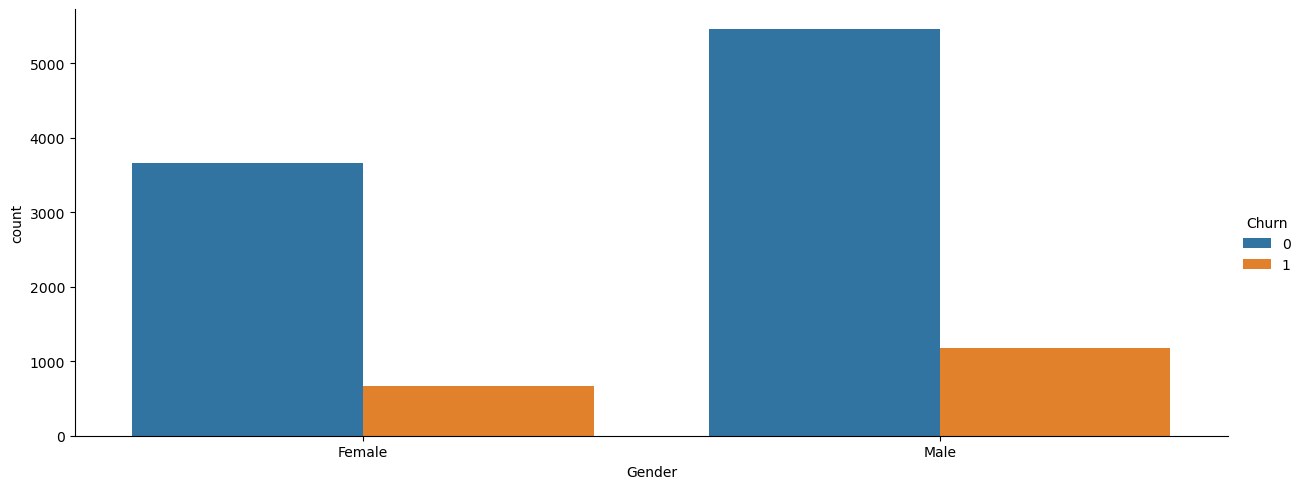

In [123]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

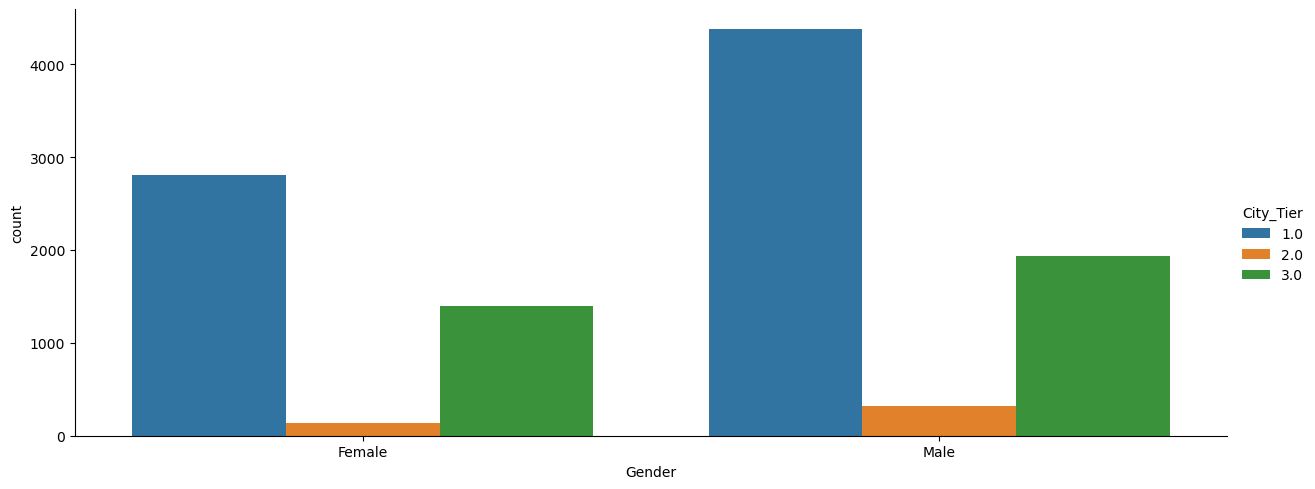

In [124]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

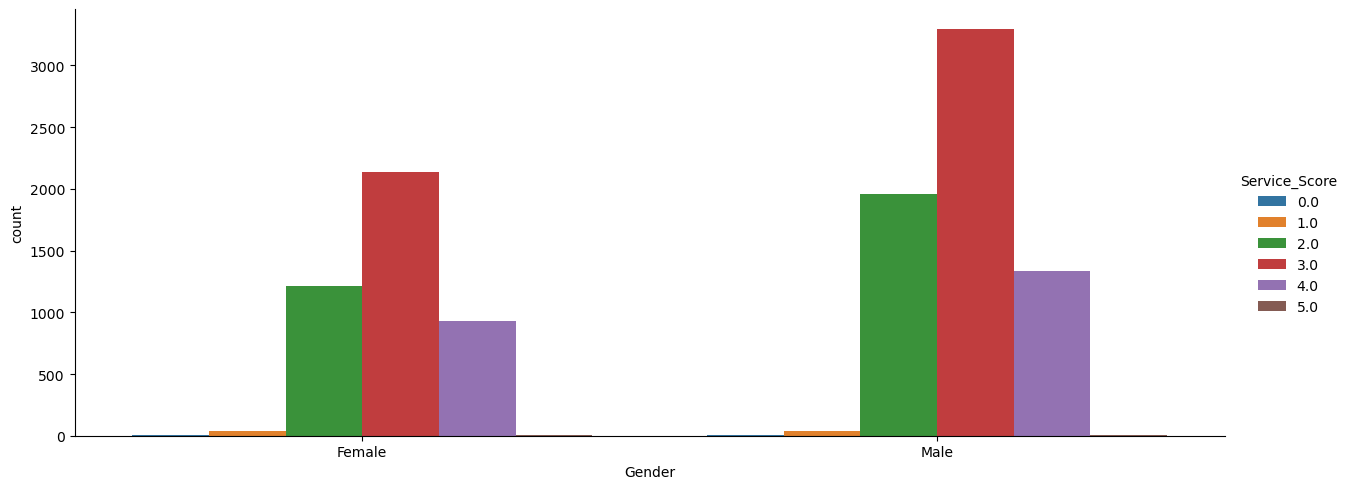

In [125]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

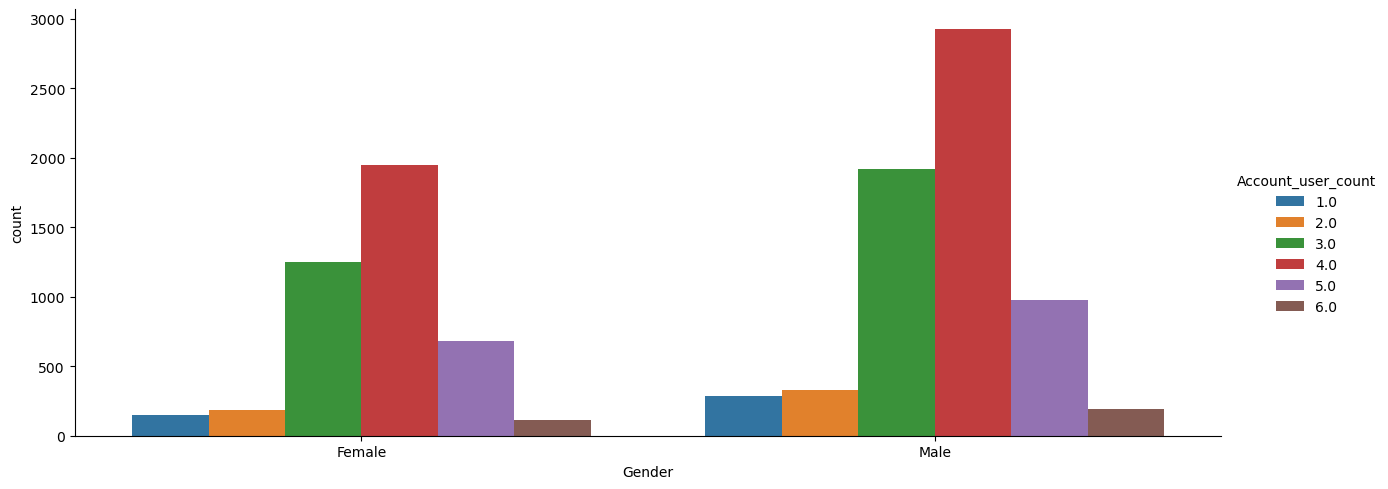

In [126]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

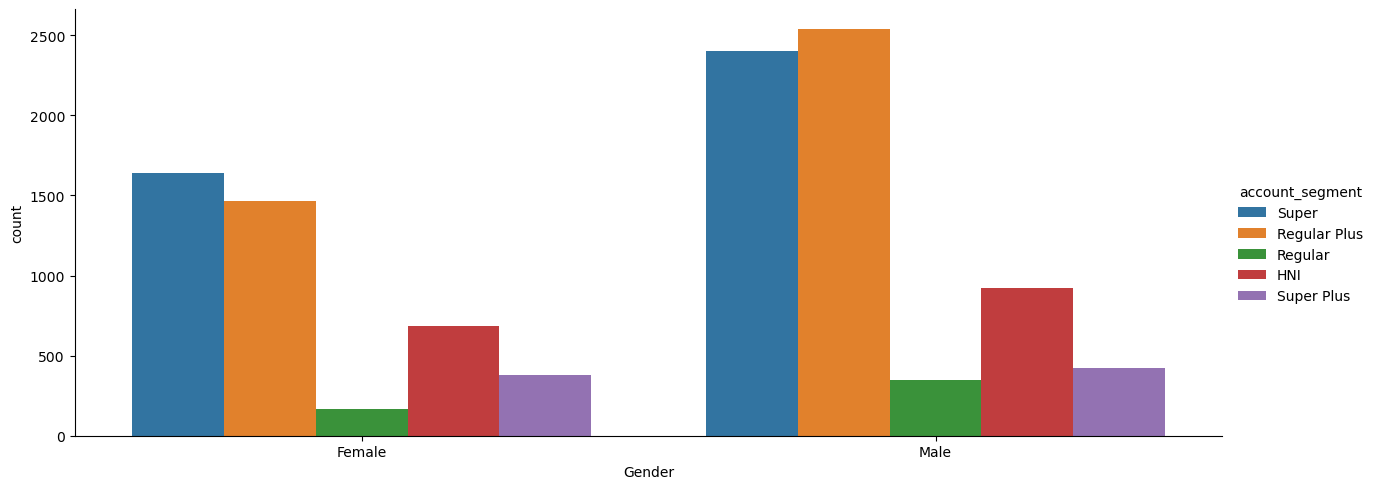

In [127]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'account_segment')
plt.show()

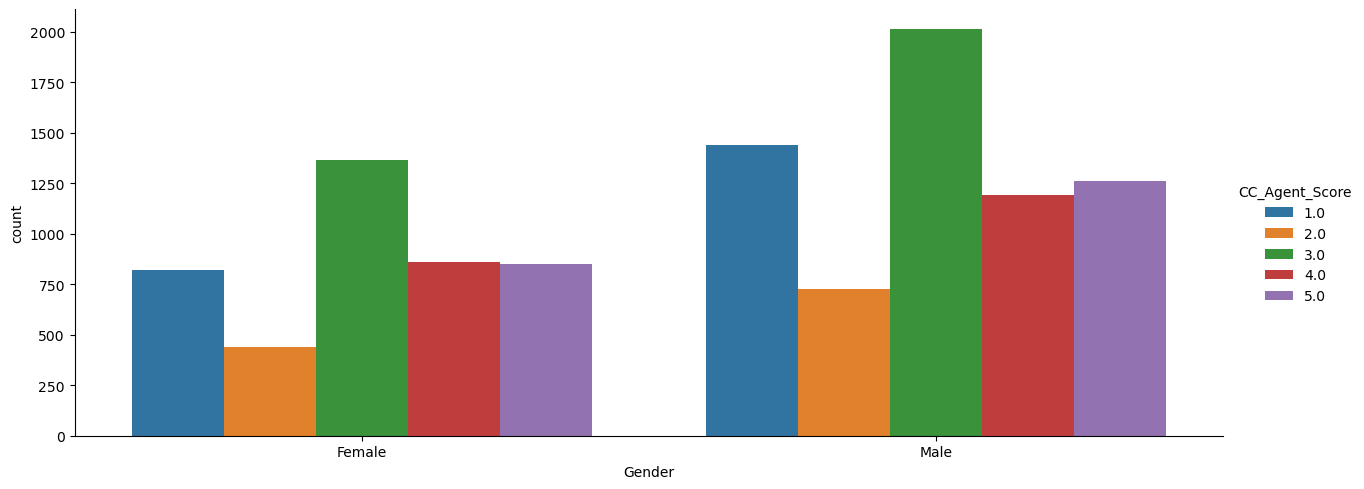

In [128]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

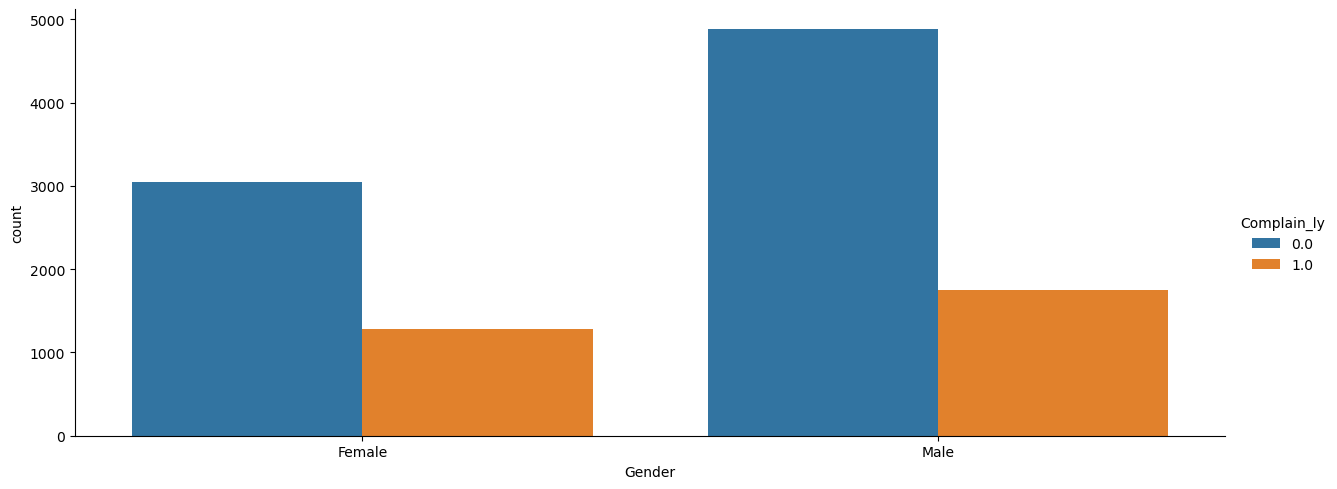

In [129]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

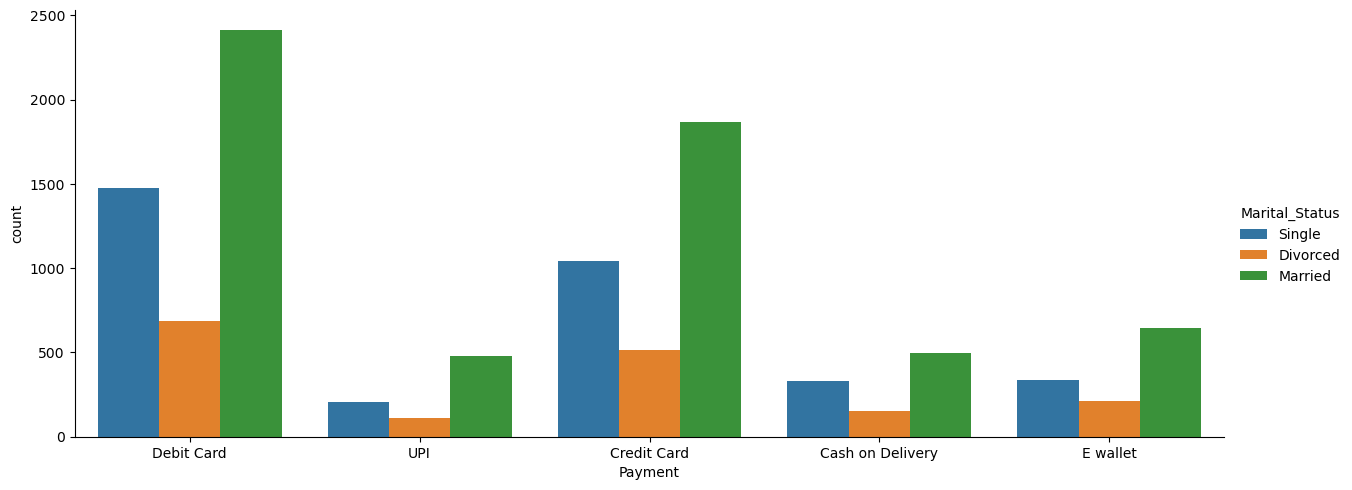

In [130]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

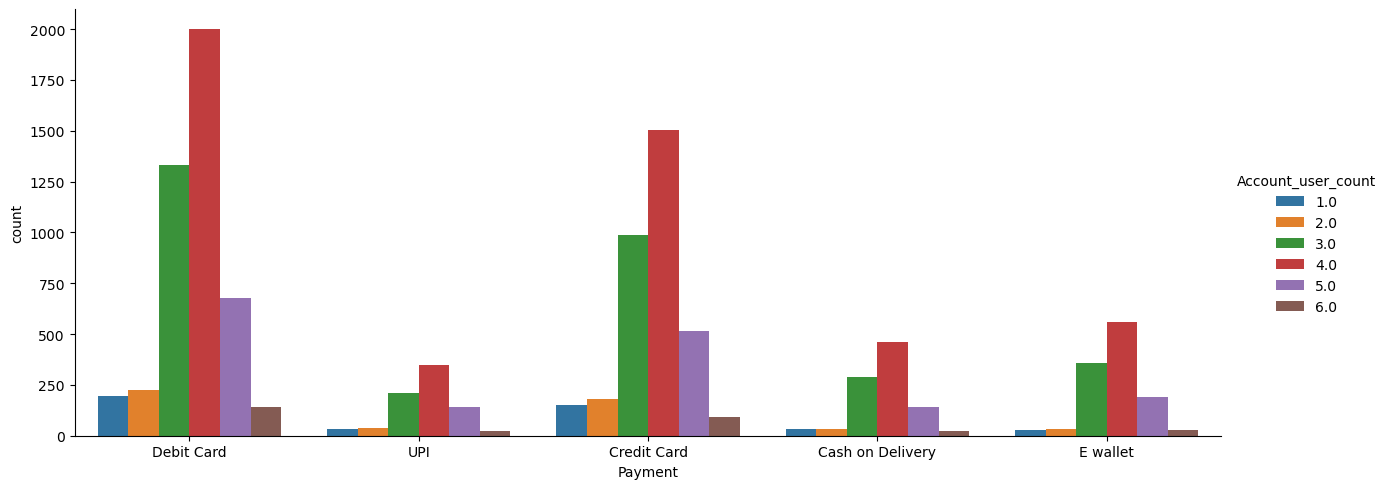

In [131]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

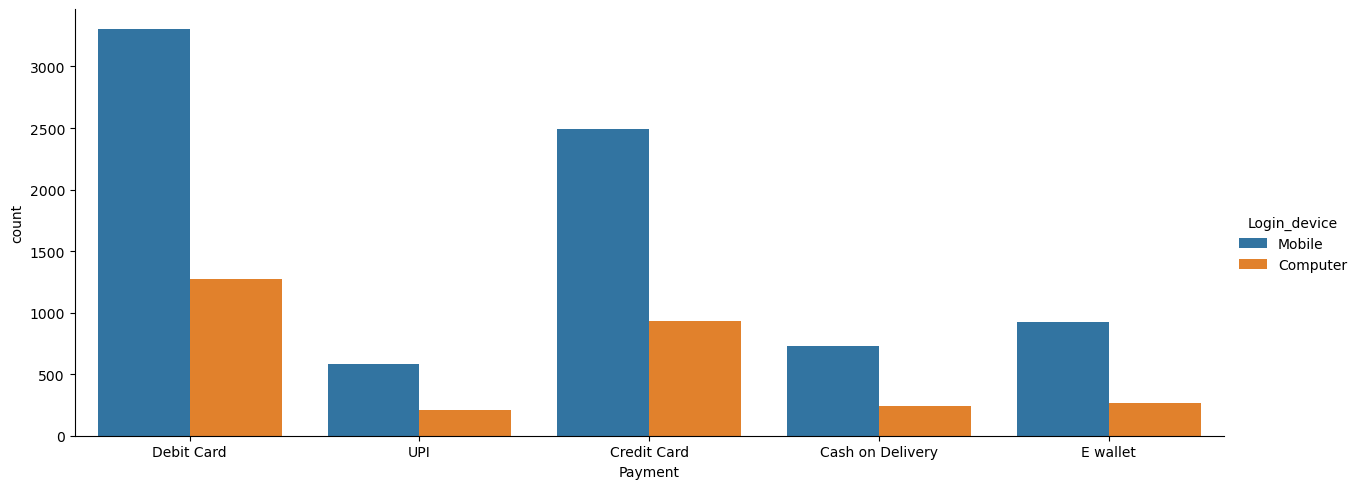

In [132]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Login_device')
plt.show()

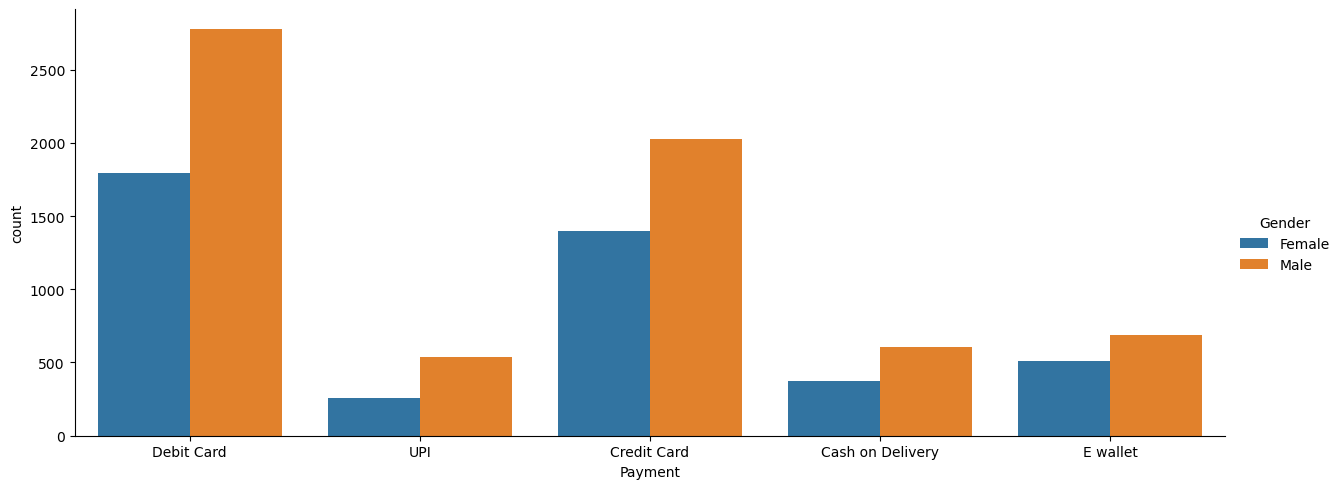

In [133]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Gender')
plt.show()

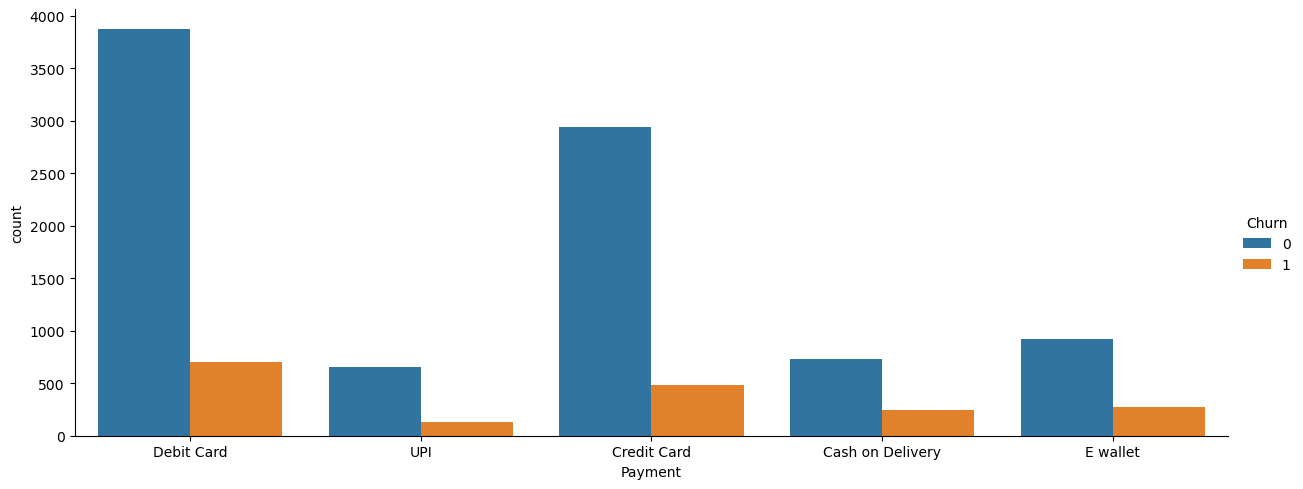

In [134]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

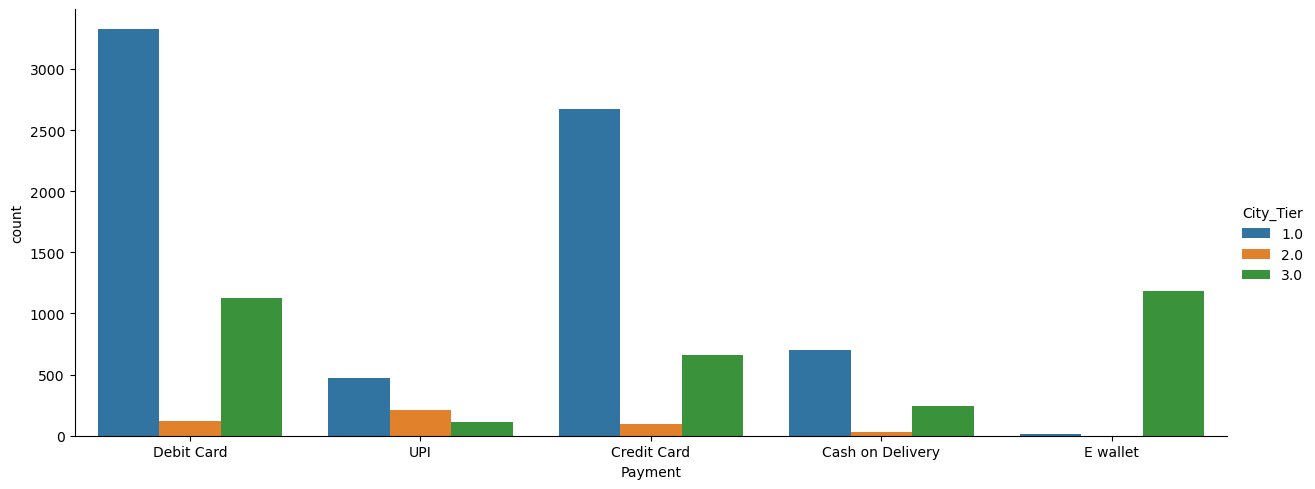

In [135]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

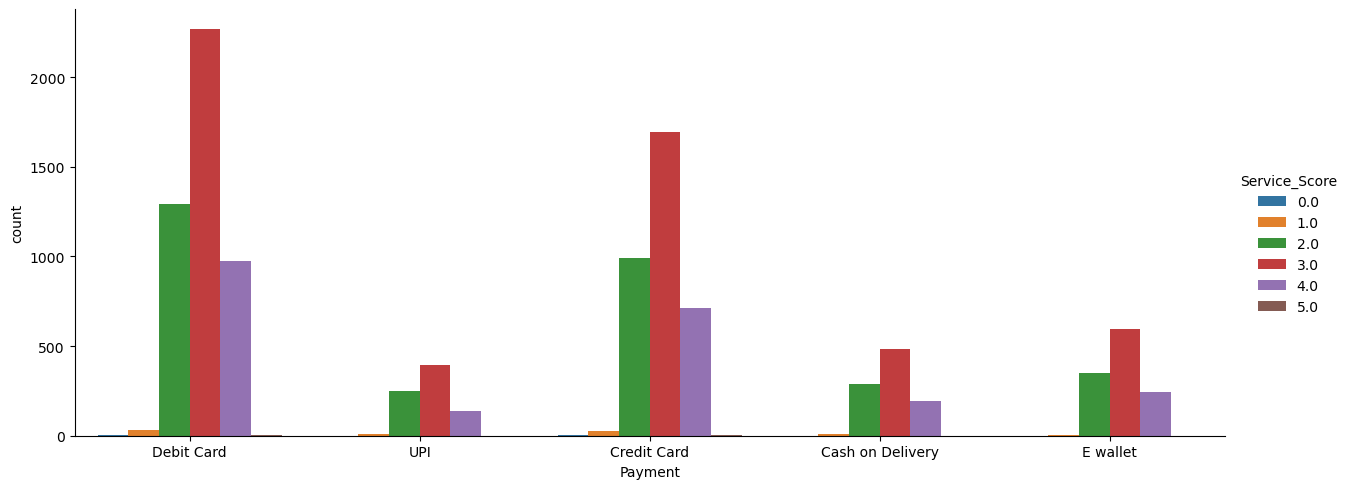

In [136]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

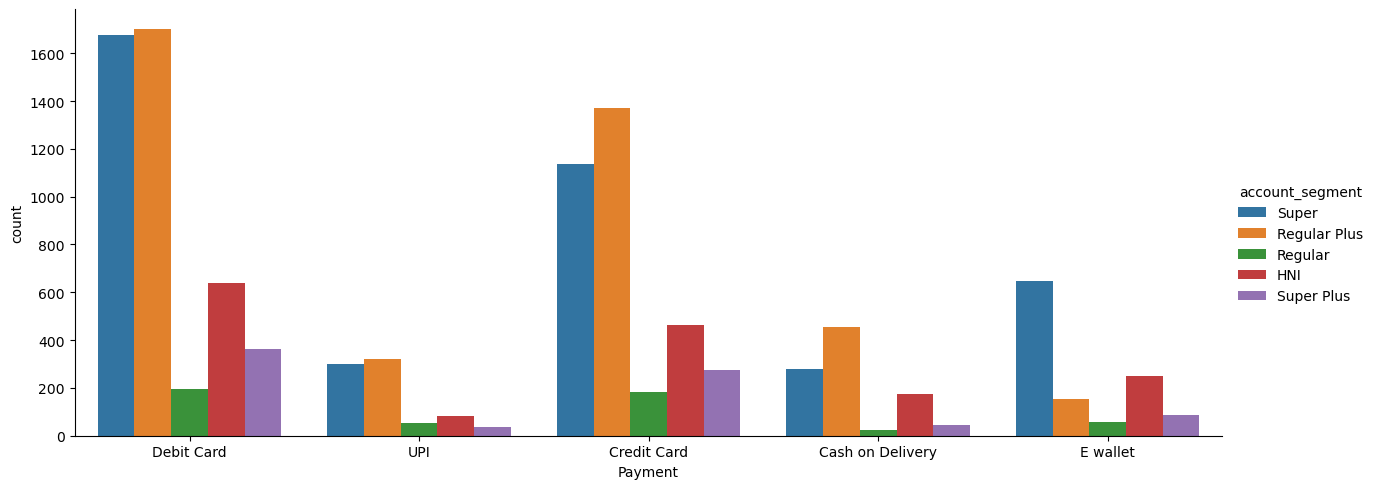

In [137]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'account_segment')
plt.show()

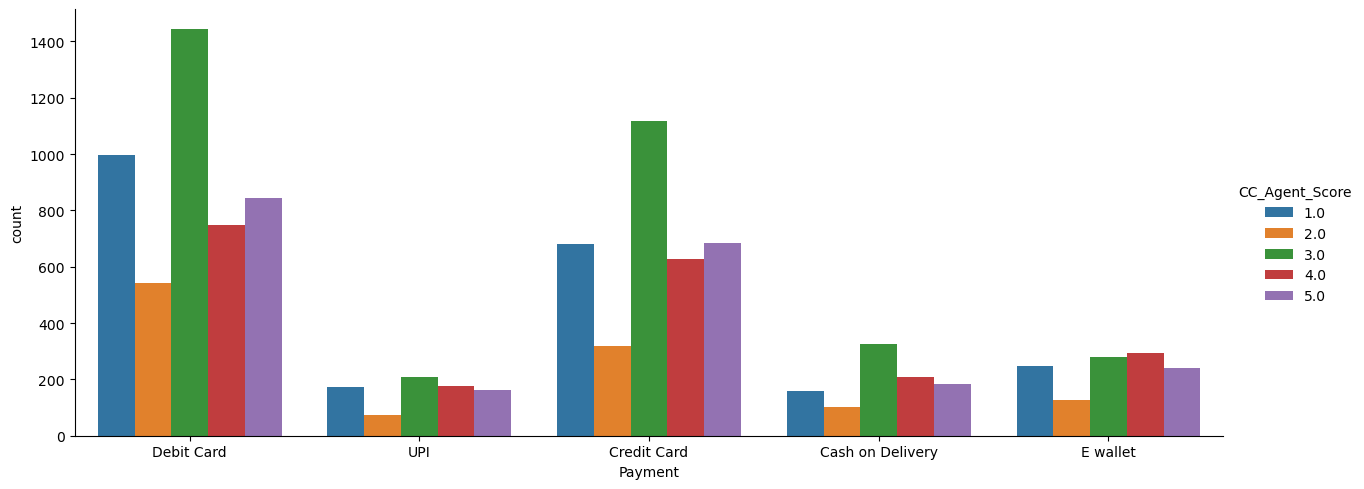

In [138]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

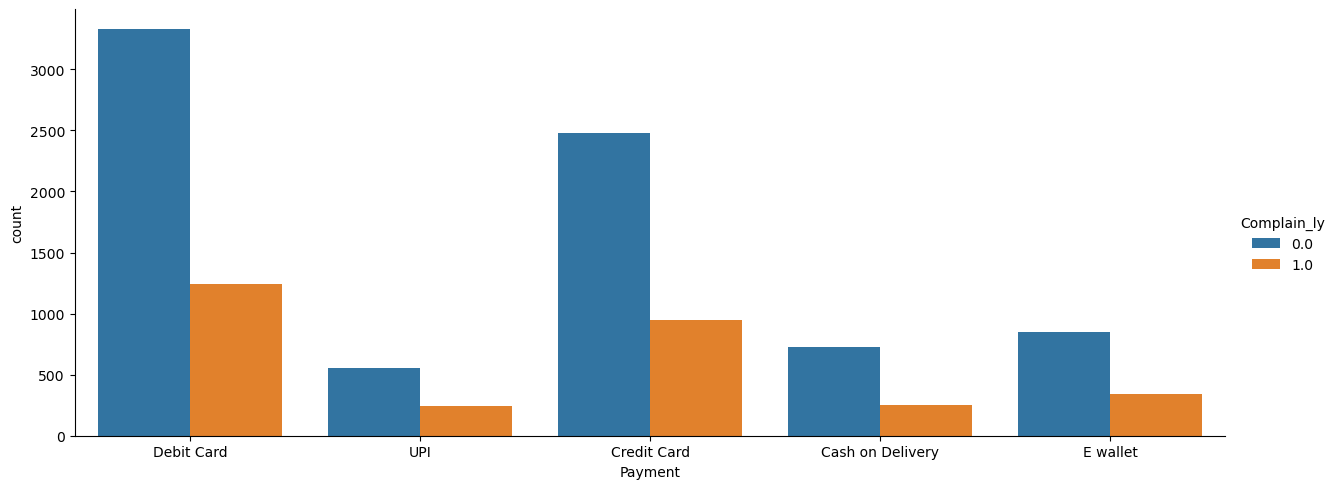

In [139]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

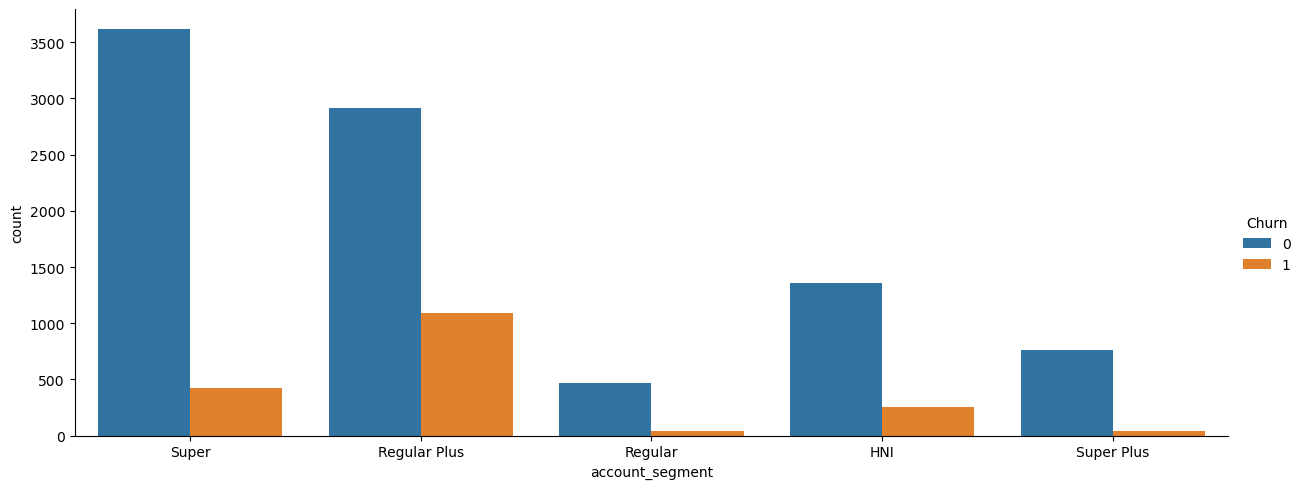

In [140]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

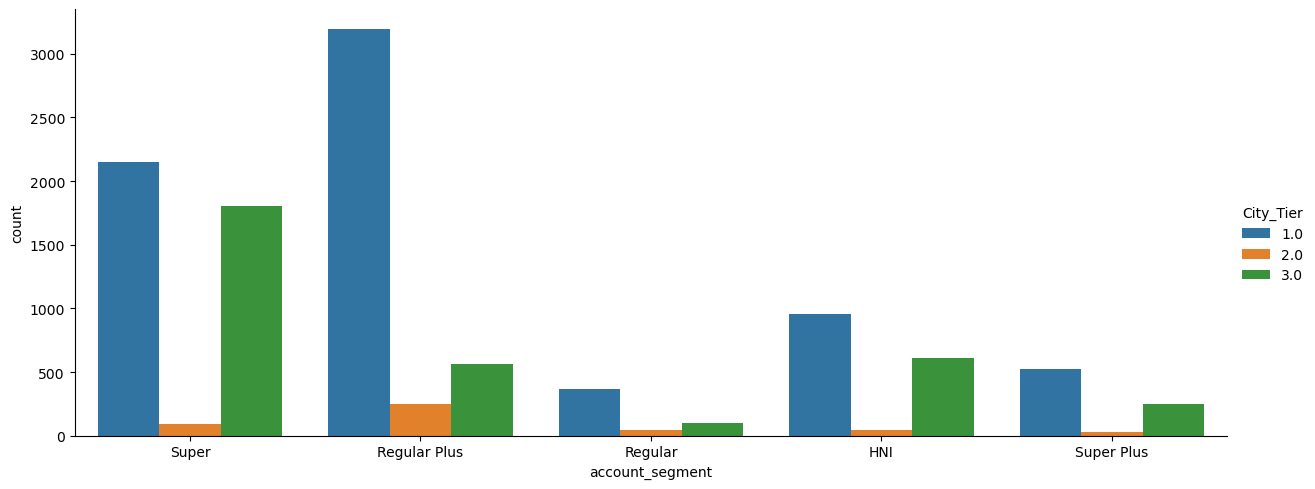

In [141]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

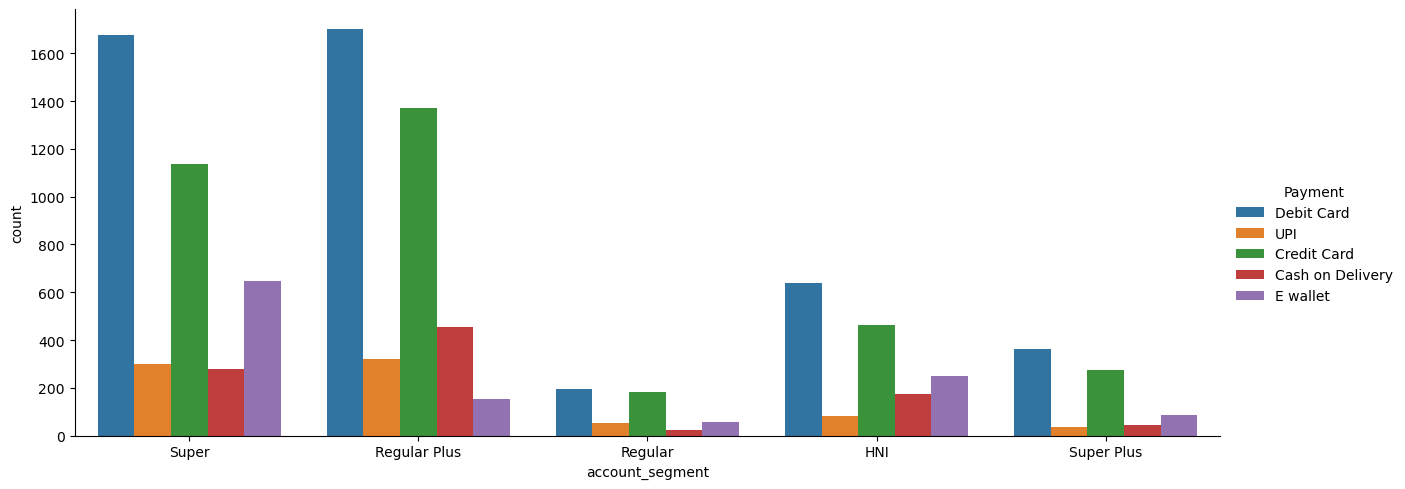

In [142]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Payment')
plt.show()

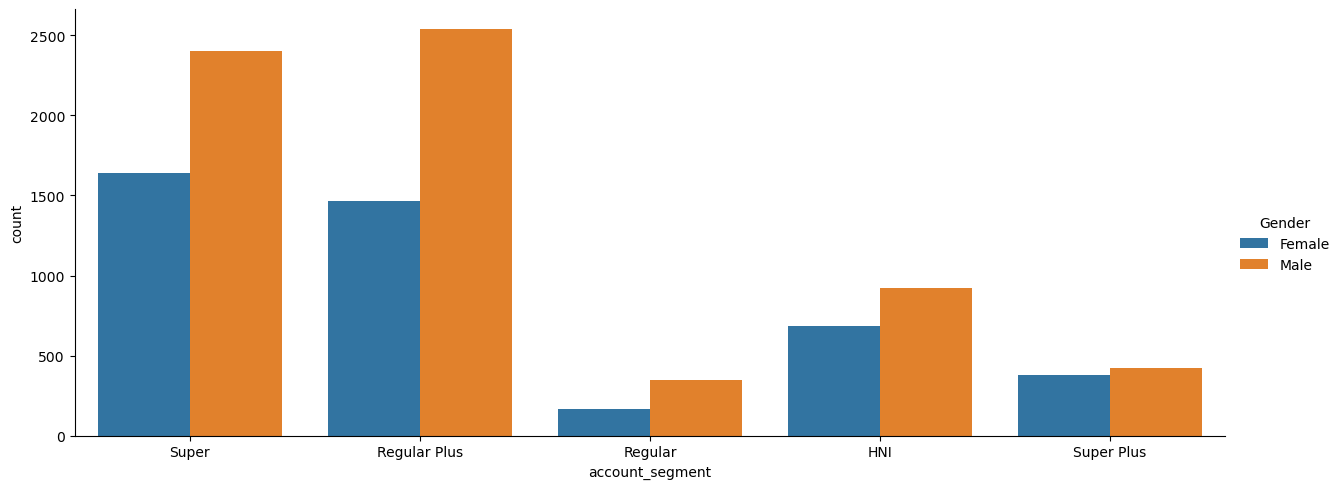

In [143]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Gender')
plt.show()

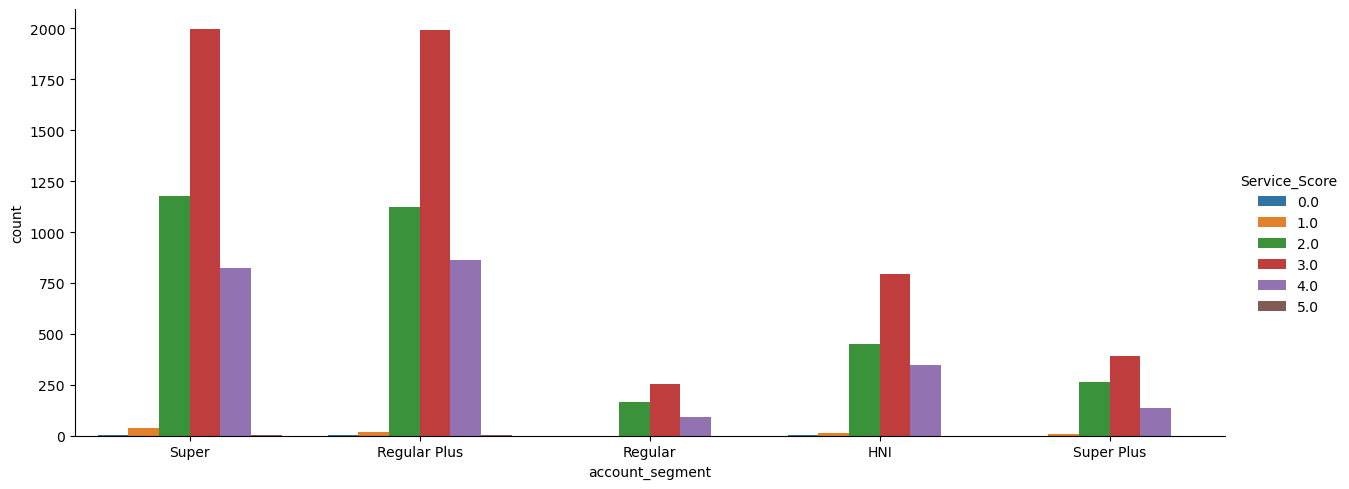

In [144]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

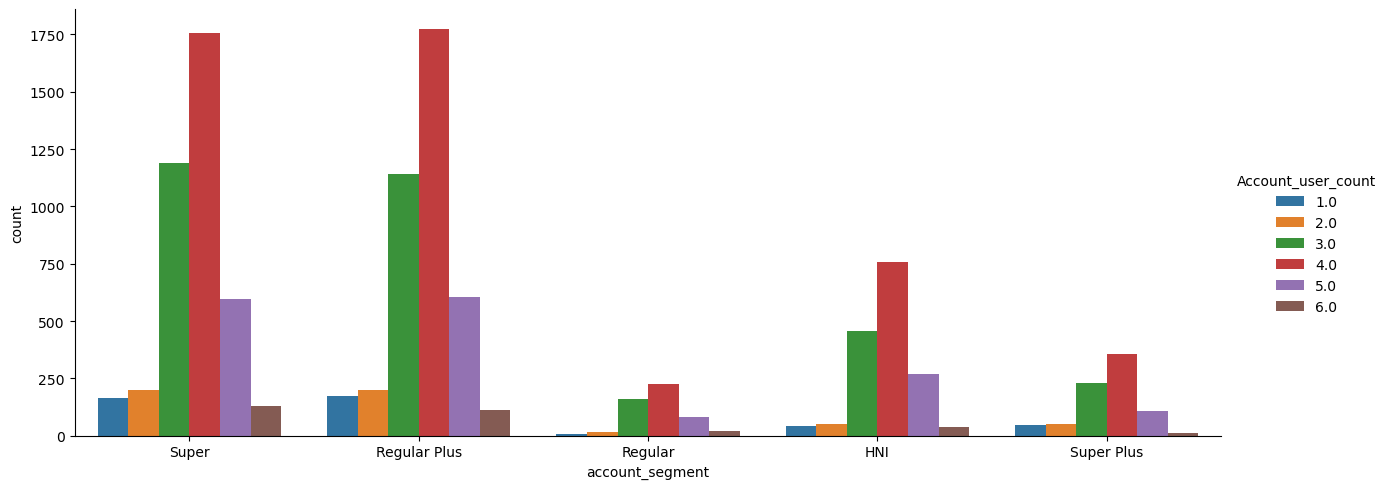

In [145]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

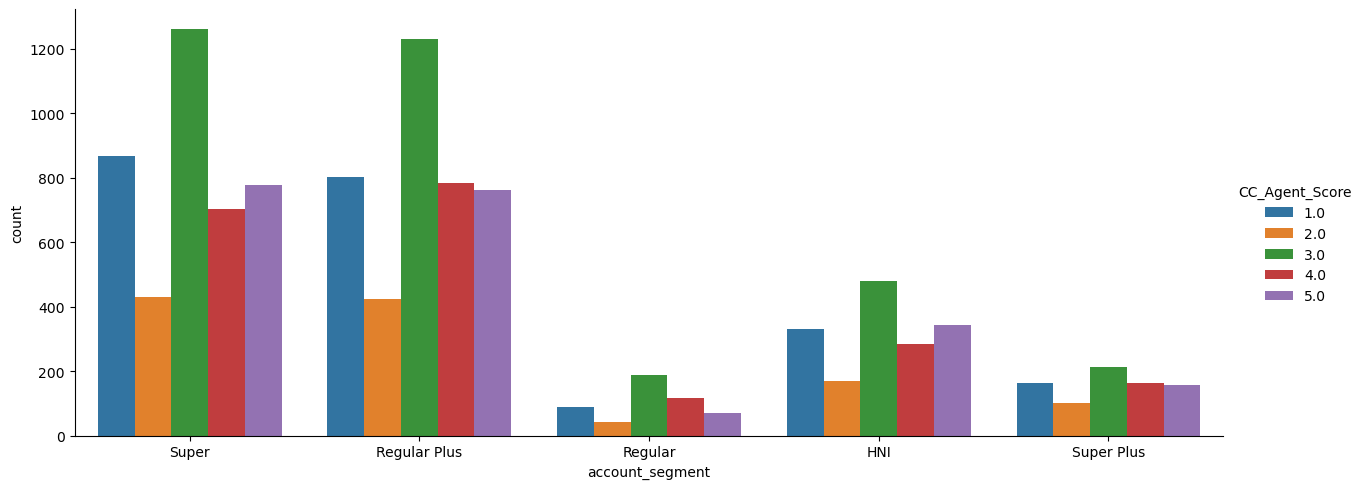

In [146]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

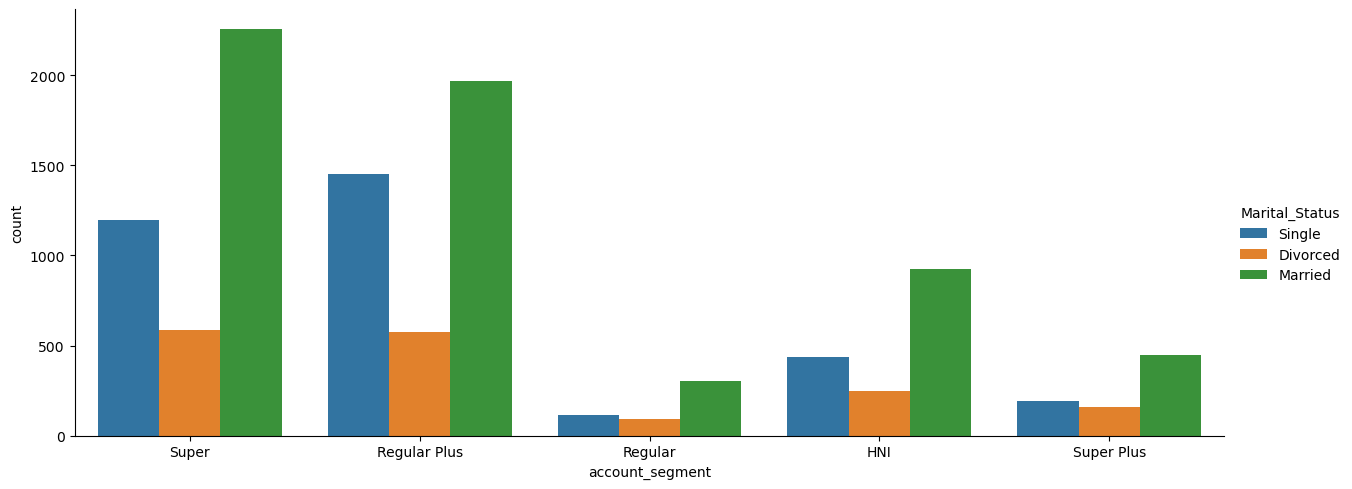

In [147]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

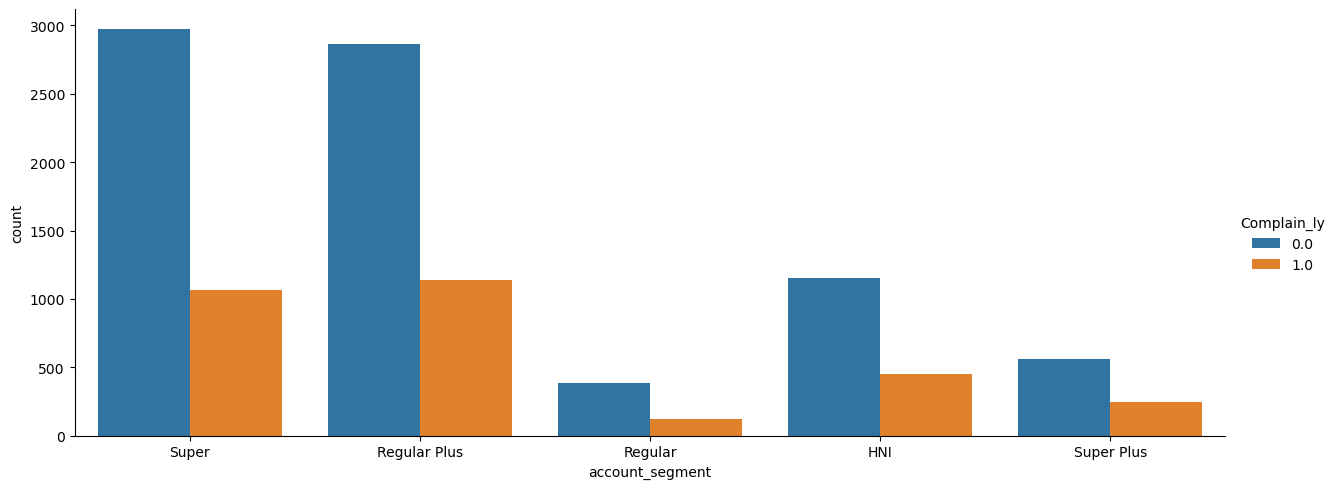

In [148]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

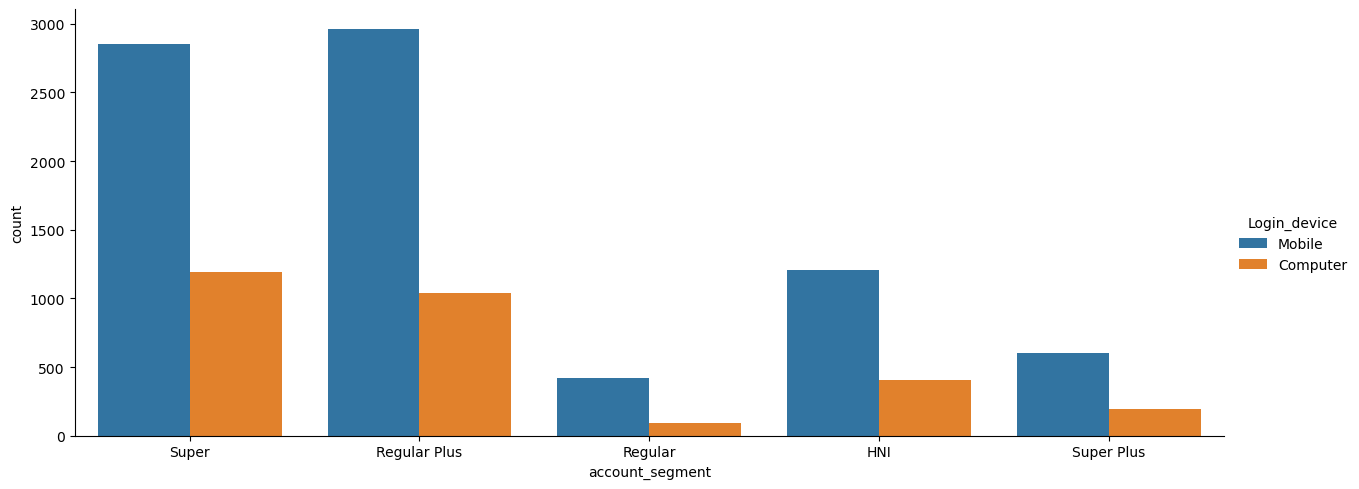

In [149]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Login_device')
plt.show()

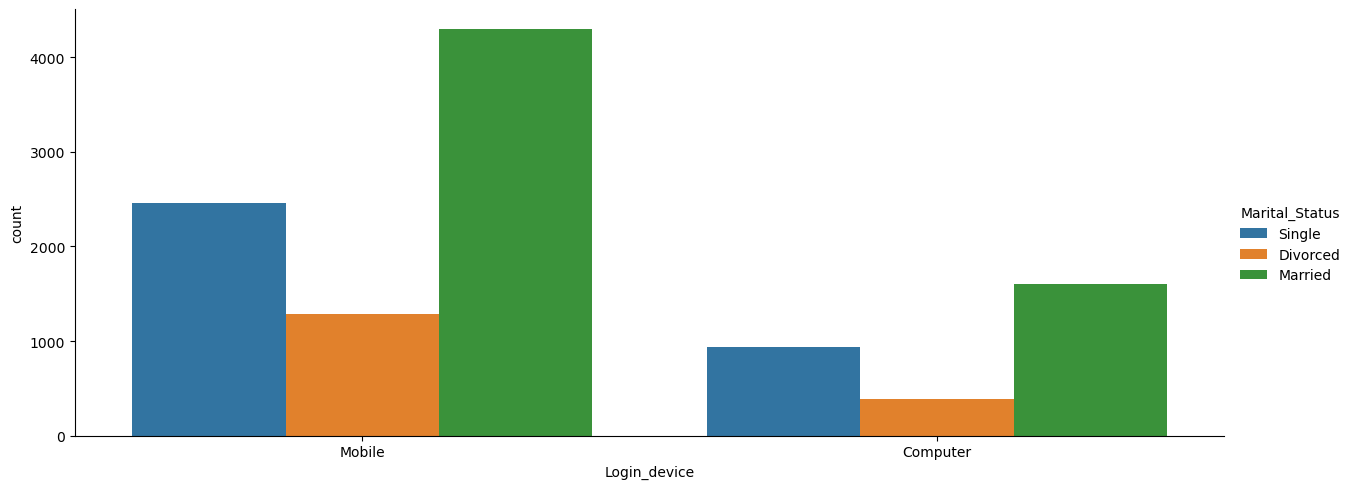

In [150]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

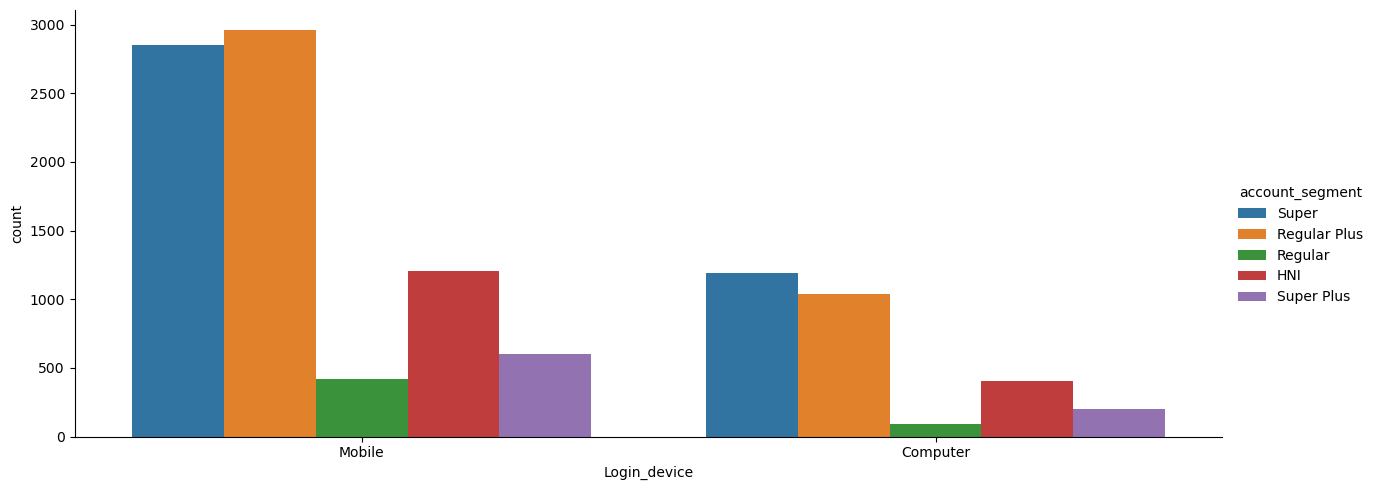

In [151]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'account_segment')
plt.show()

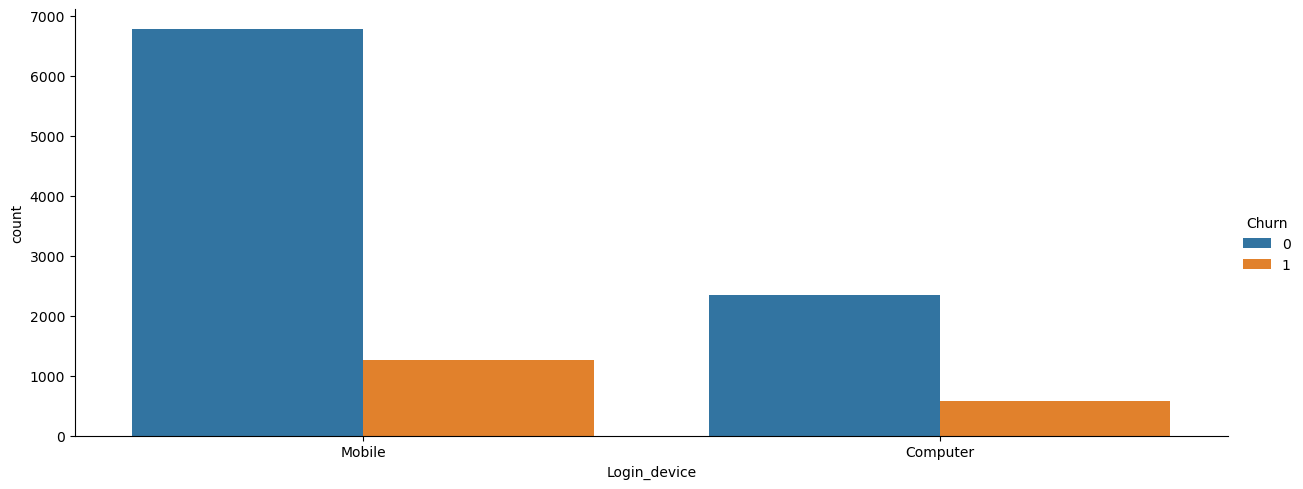

In [152]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

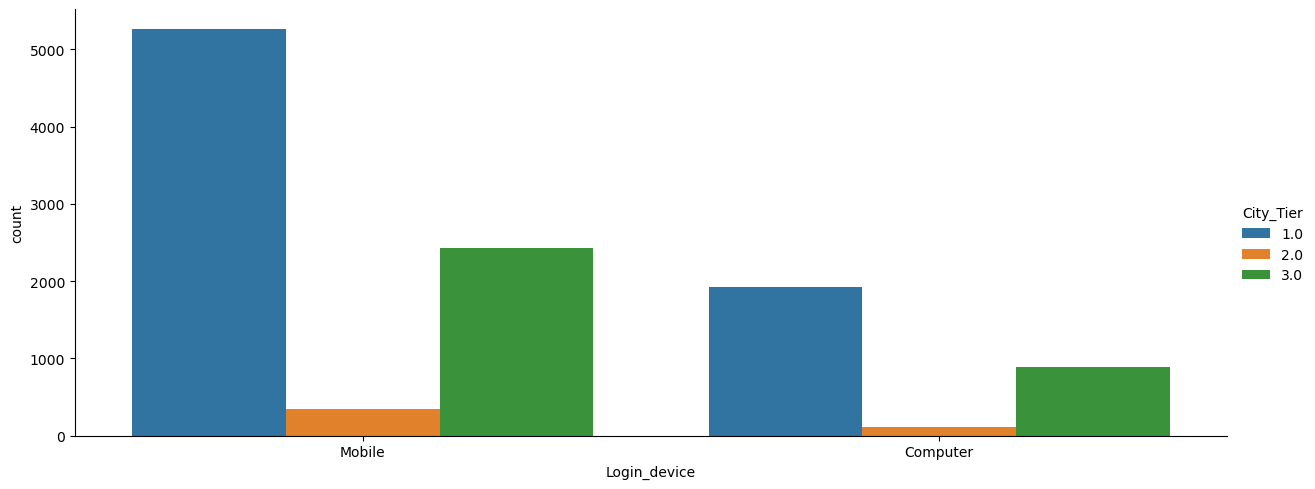

In [153]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

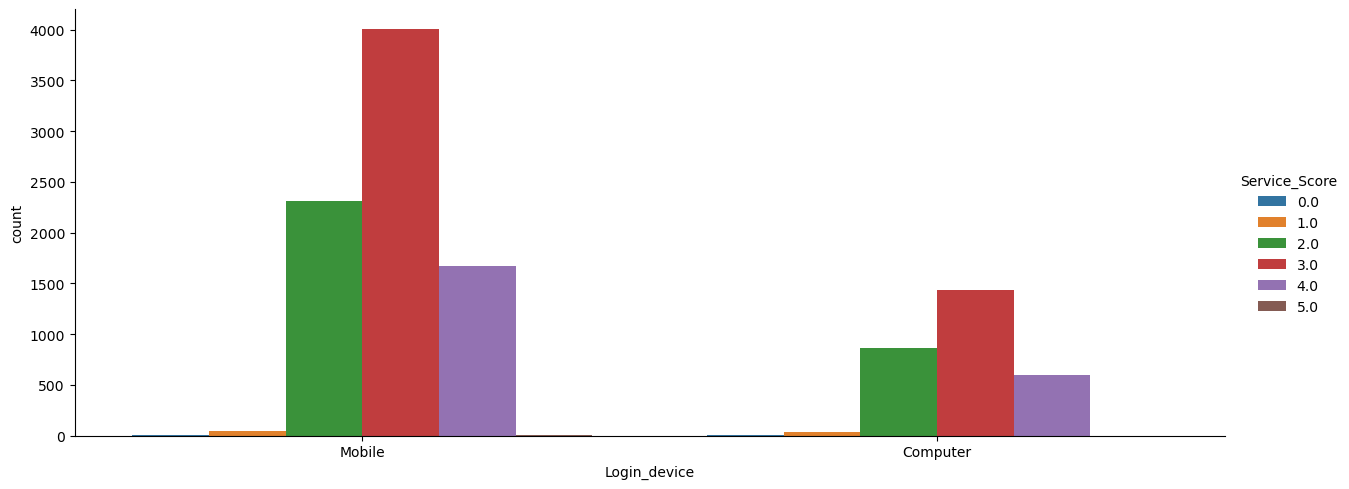

In [154]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

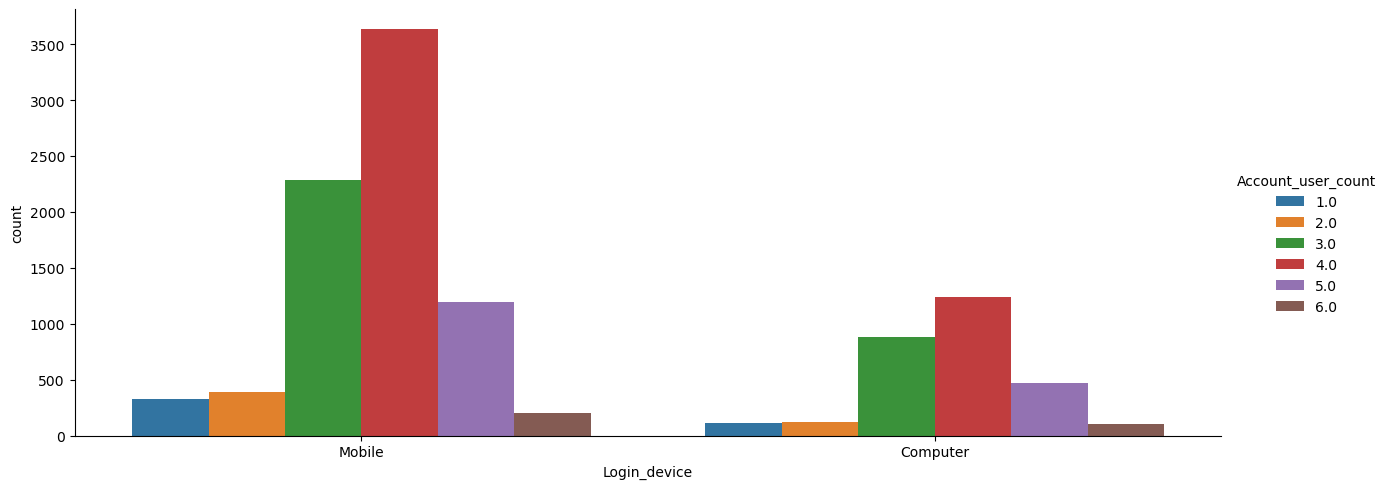

In [155]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

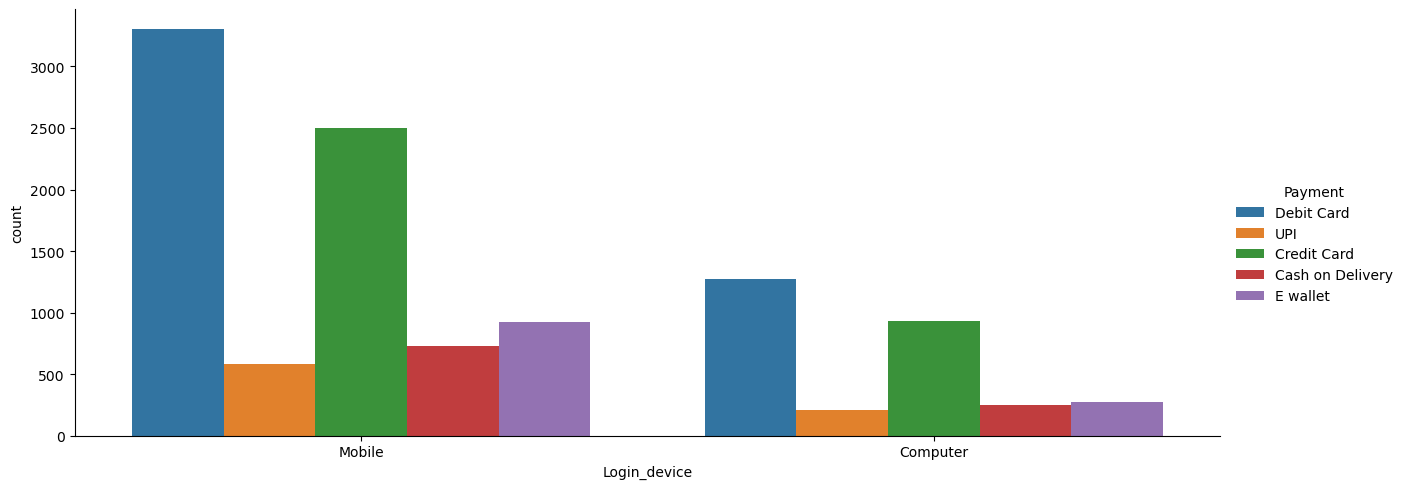

In [156]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Payment')
plt.show()

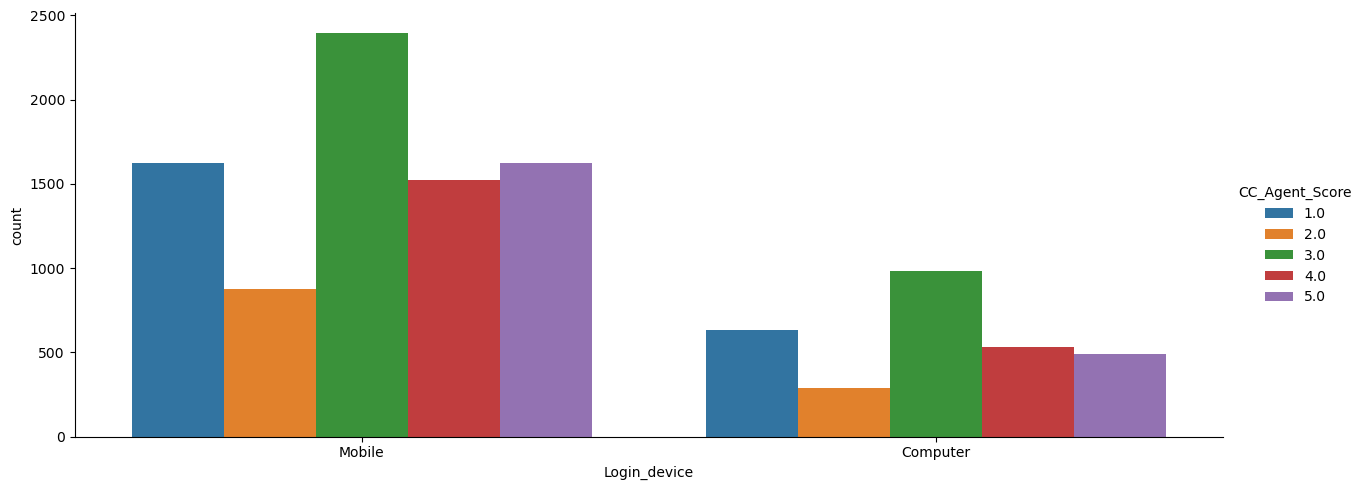

In [157]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

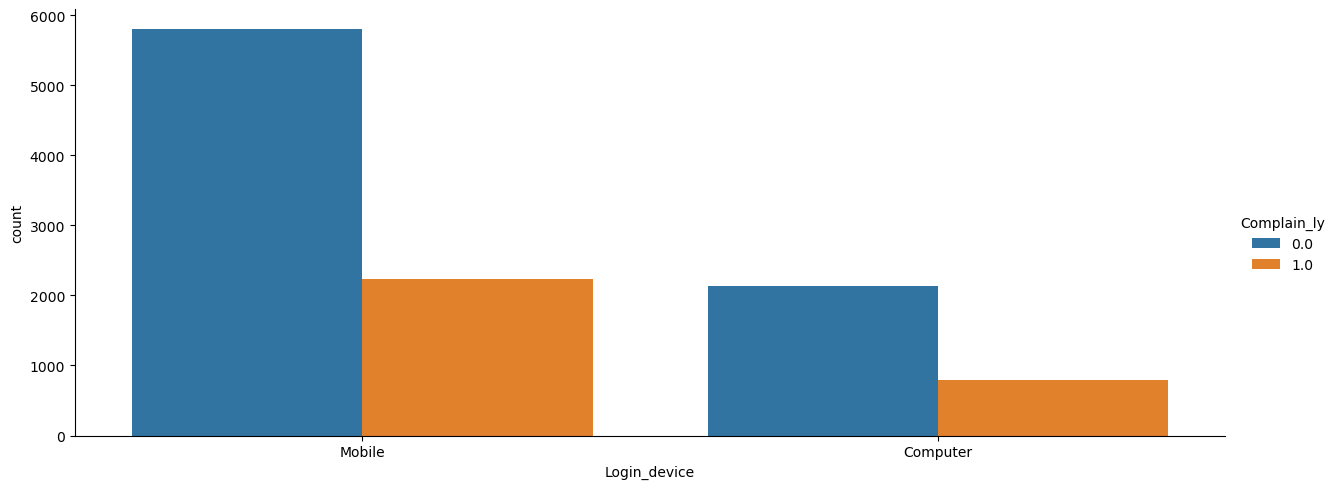

In [158]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

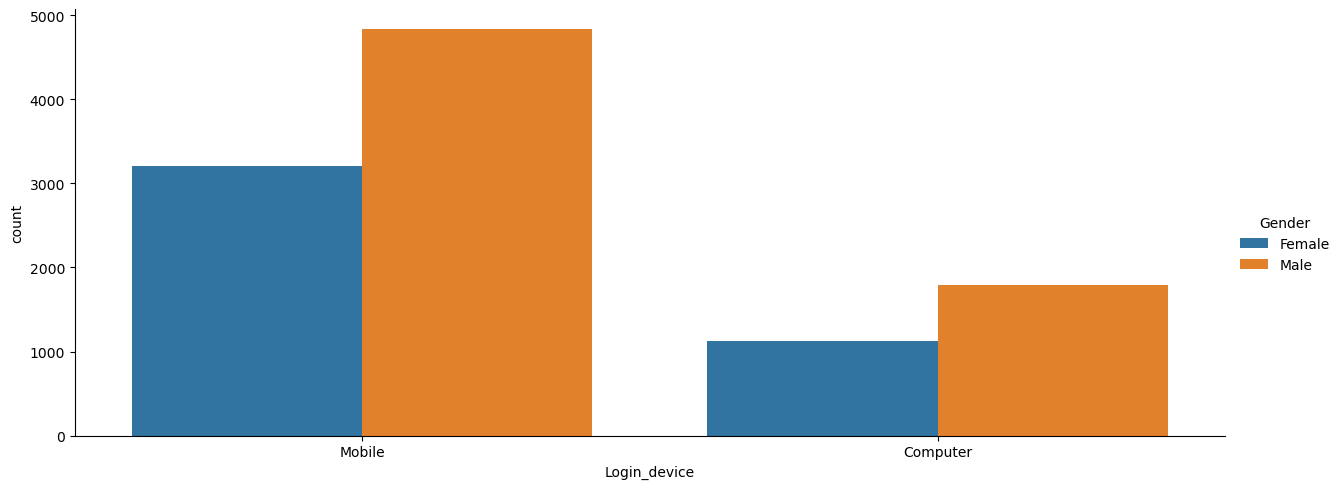

In [159]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Gender')
plt.show()

### Outlier Checks:

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 0 to 11258
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    10962 non-null  int64  
 1   Tenure                   10962 non-null  float64
 2   City_Tier                10962 non-null  float64
 3   CC_Contacted_LY          10962 non-null  float64
 4   Payment                  10962 non-null  object 
 5   Gender                   10962 non-null  object 
 6   Service_Score            10962 non-null  float64
 7   Account_user_count       10962 non-null  float64
 8   account_segment          10962 non-null  object 
 9   CC_Agent_Score           10962 non-null  float64
 10  Marital_Status           10962 non-null  object 
 11  rev_per_month            10962 non-null  float64
 12  Complain_ly              10962 non-null  float64
 13  rev_growth_yoy           10962 non-null  float64
 14  coupon_used_for_paymen

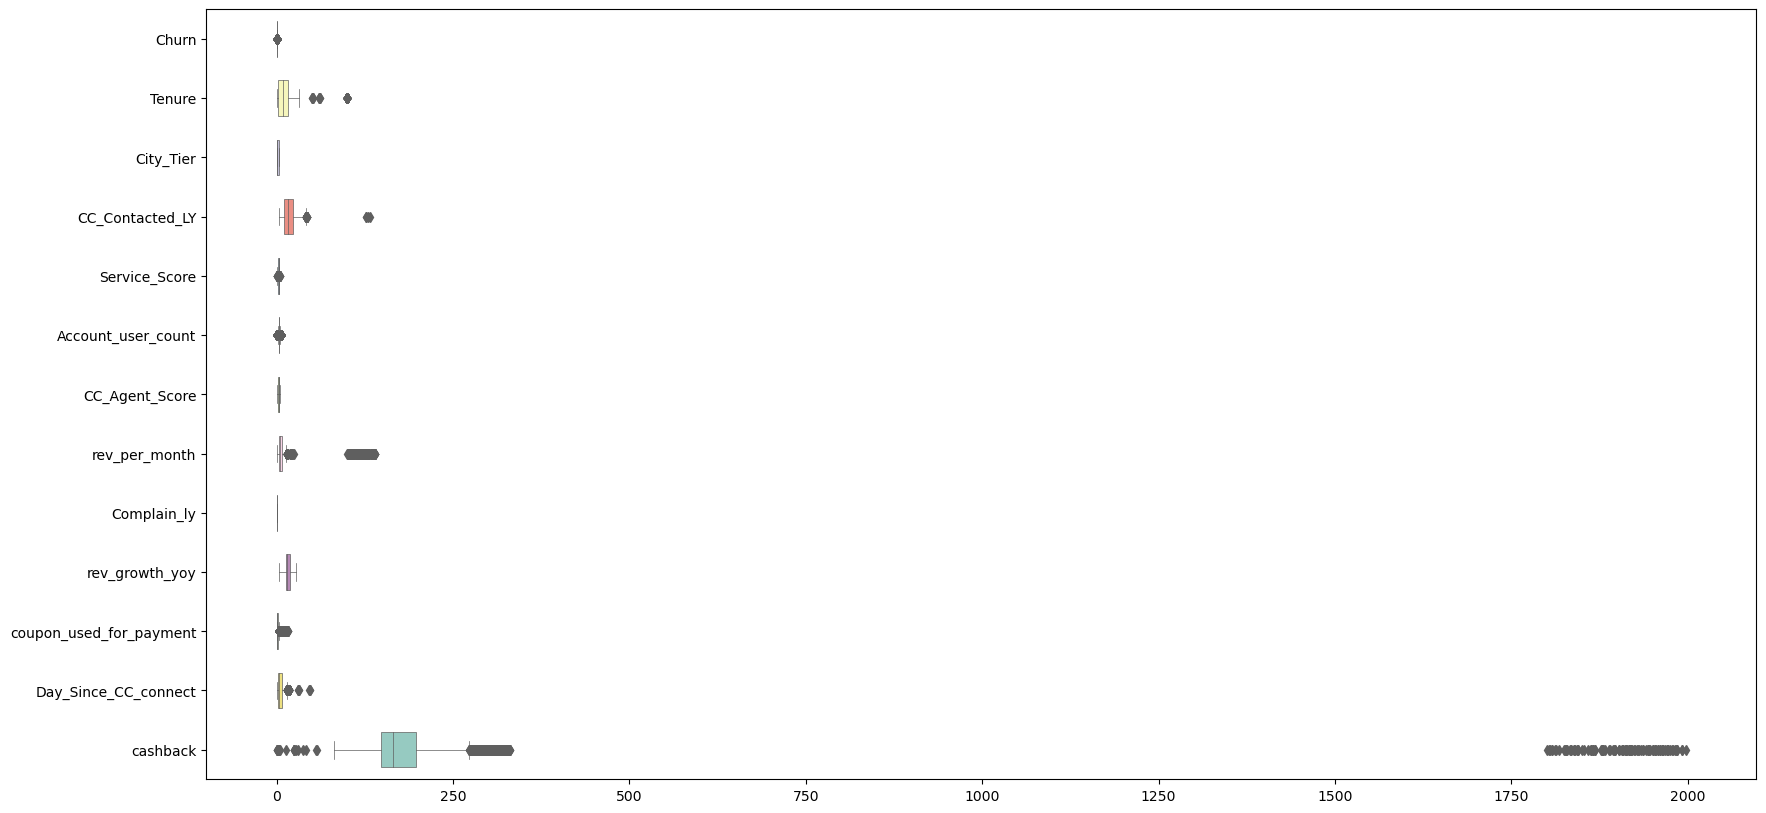

In [161]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

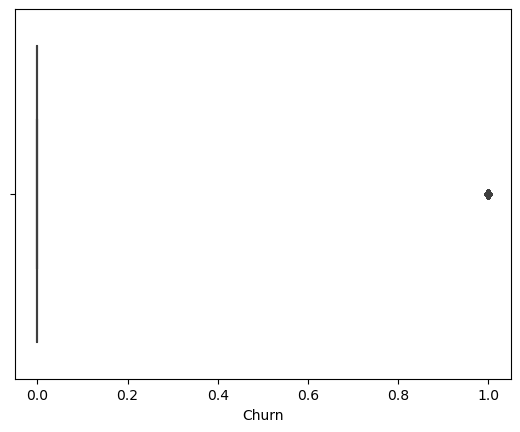

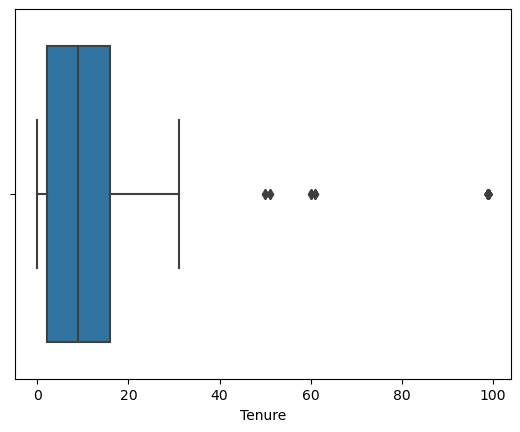

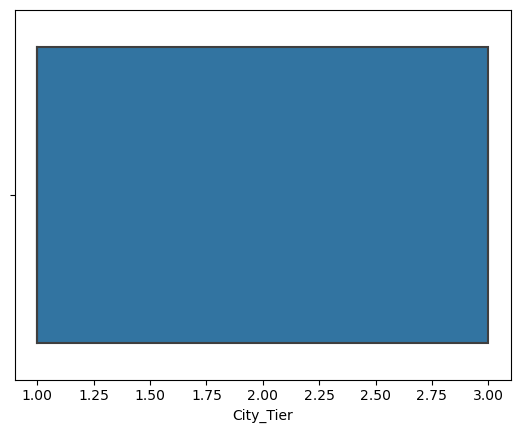

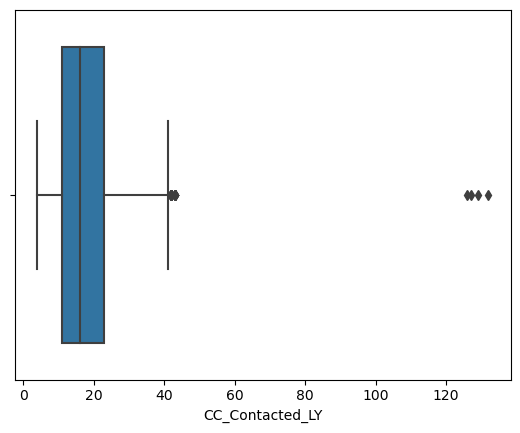

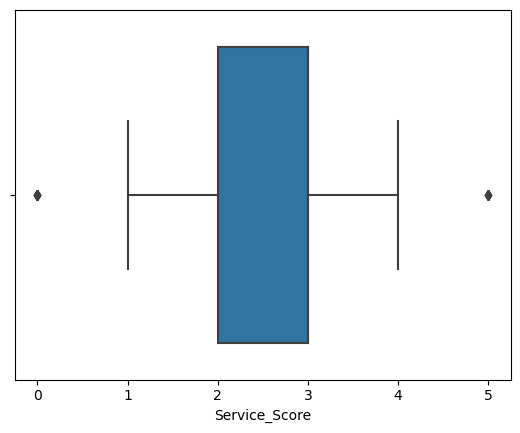

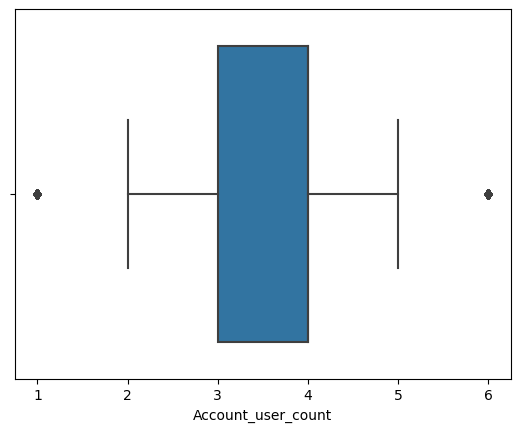

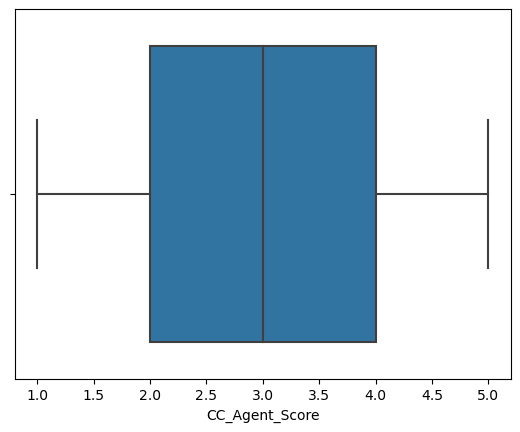

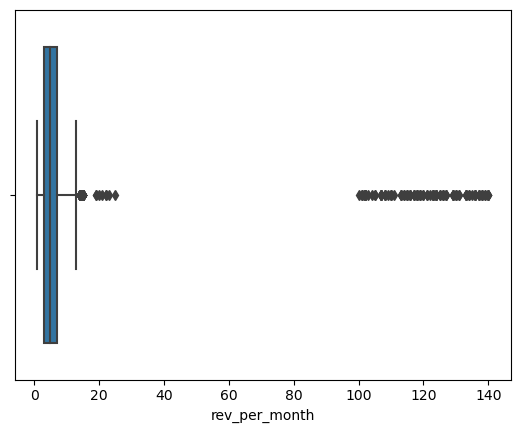

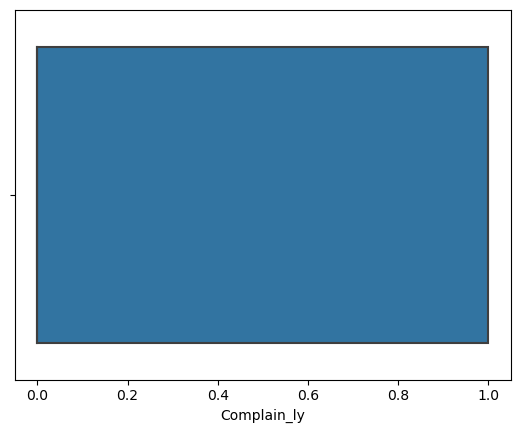

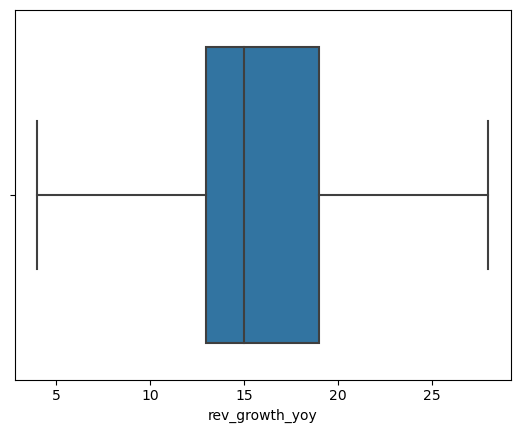

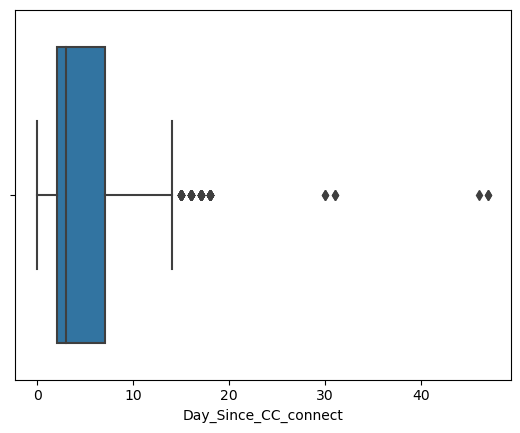

In [162]:
cols = ['Churn','Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score','Account_user_count','CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### Treating the Outliers:

In [163]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [164]:
for feature in df[['rev_per_month','coupon_used_for_payment', 'cashback', 'Day_Since_CC_connect']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

### Verifing the Outliers treatment:

In [165]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

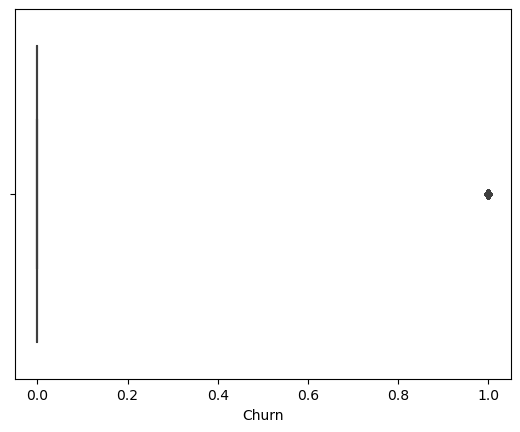

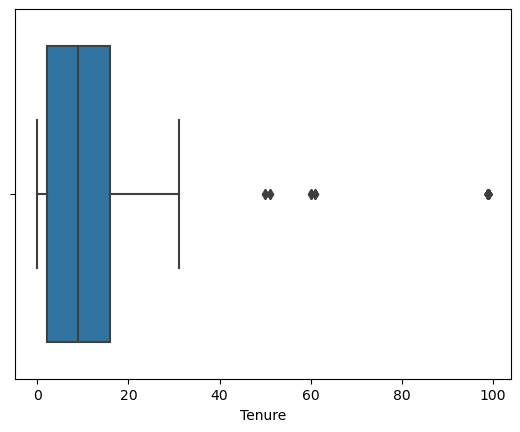

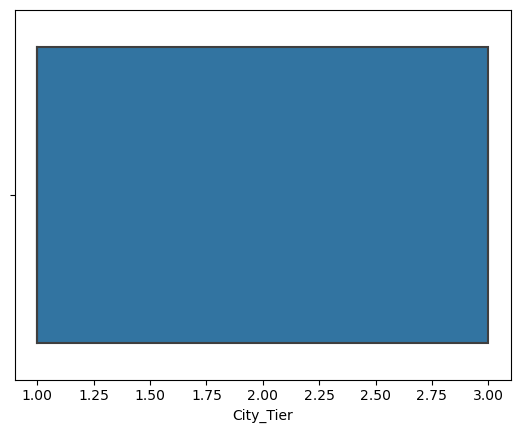

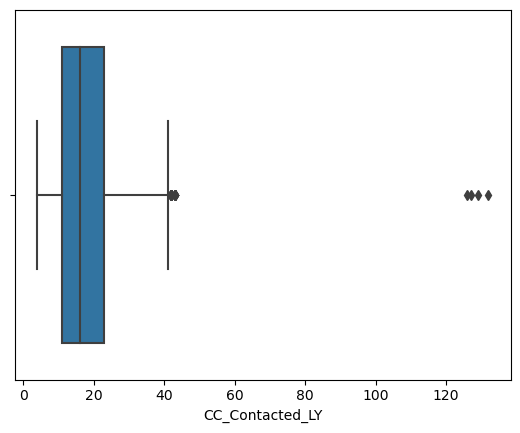

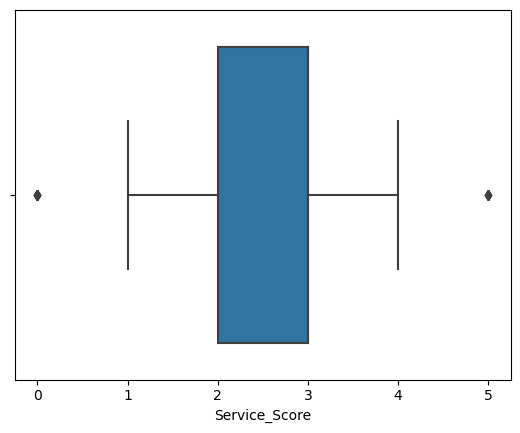

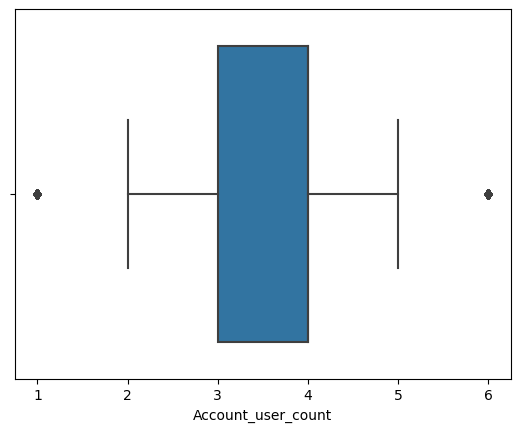

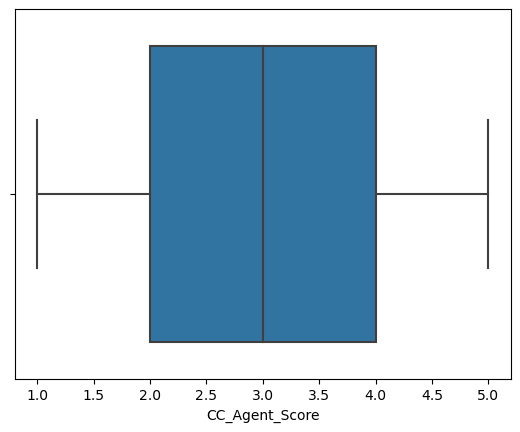

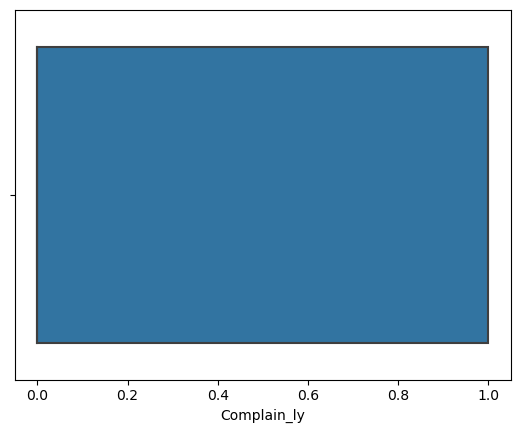

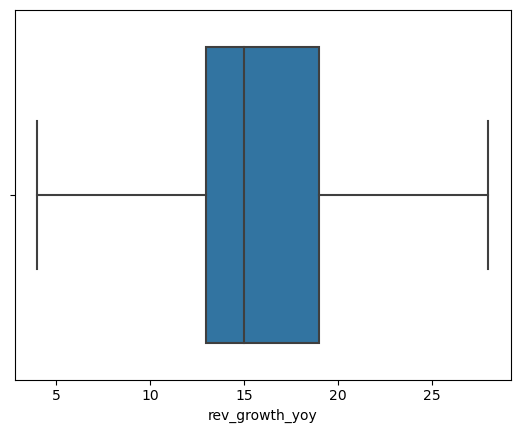

In [166]:
cols = ['Churn','Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score','Account_user_count','CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### Clustering:

In [167]:
# Geting unique counts of all Objects.

print('Payment\n',df.Payment.value_counts())
print('\n')
print('Gender\n',df.Gender.value_counts())
print('\n')
print('account_segment\n',df.account_segment.value_counts())
print('\n')
print('Marital_Status\n',df.Marital_Status.value_counts())
print('\n')
print('Login_device\n',df.Login_device.value_counts())
print('\n')

Payment
 Debit Card          4572
Credit Card         3427
E wallet            1193
Cash on Delivery     976
UPI                  794
Name: Payment, dtype: int64


Gender
 Male      6630
Female    4332
Name: Gender, dtype: int64


account_segment
 Super           4040
Regular Plus    4001
HNI             1609
Super Plus       801
Regular          511
Name: account_segment, dtype: int64


Marital_Status
 Married     5898
Single      3396
Divorced    1668
Name: Marital_Status, dtype: int64


Login_device
 Mobile      8036
Computer    2926
Name: Login_device, dtype: int64




#### Converting objects to categorical codes:

In [168]:
df['Payment']=np.where(df['Payment'] =='Debit Card', '4', df['Payment'])
df['Payment']=np.where(df['Payment'] =='Credit Card', '3', df['Payment'])
df['Payment']=np.where(df['Payment'] =='E wallet', '2', df['Payment'])
df['Payment']=np.where(df['Payment'] =='Cash on Delivery', '1', df['Payment'])
df['Payment']=np.where(df['Payment'] =='UPI', '0', df['Payment'])

In [169]:
df['Marital_Status']=np.where(df['Marital_Status'] =='Married', '2', df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] =='Single', '1', df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] =='Divorced', '0', df['Marital_Status'])

In [170]:
df['Gender']=np.where(df['Gender'] =='Male', '1', df['Gender'])
df['Gender']=np.where(df['Gender'] =='Female', '0', df['Gender'])

In [171]:
df['Login_device']=np.where(df['Login_device'] =='Mobile', '1', df['Login_device'])
df['Login_device']=np.where(df['Login_device'] =='Computer', '0', df['Login_device'])

In [172]:
df['account_segment']=np.where(df['account_segment'] =='Super', '4', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Regular Plus', '3', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='HNI', '2', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Super Plus', '1', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Regular', '0', df['account_segment'])

In [173]:
# converting the'cut','color','clarity' column from object / string type to float.

df['Payment'] = df['Payment'].astype('float64')
df['Marital_Status'] = df['Marital_Status'].astype('float64')
df['Gender'] = df['Gender'].astype('float64')
df['Login_device'] = df['Login_device'].astype('float64')
df['account_segment'] = df['account_segment'].astype('float64')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 0 to 11258
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    10962 non-null  int64  
 1   Tenure                   10962 non-null  float64
 2   City_Tier                10962 non-null  float64
 3   CC_Contacted_LY          10962 non-null  float64
 4   Payment                  10962 non-null  float64
 5   Gender                   10962 non-null  float64
 6   Service_Score            10962 non-null  float64
 7   Account_user_count       10962 non-null  float64
 8   account_segment          10962 non-null  float64
 9   CC_Agent_Score           10962 non-null  float64
 10  Marital_Status           10962 non-null  float64
 11  rev_per_month            10962 non-null  float64
 12  Complain_ly              10962 non-null  float64
 13  rev_growth_yoy           10962 non-null  float64
 14  coupon_used_for_paymen

In [175]:
df.head(10)

Churn  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0      1     4.0        3.0              6.0      4.0     0.0            3.0   
1      1     0.0        1.0              8.0      0.0     1.0            3.0   
2      1     0.0        1.0             30.0      4.0     1.0            2.0   
3      1     0.0        3.0             15.0      4.0     1.0            2.0   
4      1     0.0        1.0             12.0      3.0     1.0            2.0   
5      1     0.0        1.0             22.0      4.0     0.0            3.0   
6      1     2.0        3.0             11.0      1.0     1.0            2.0   
7      1     0.0        1.0              6.0      3.0     1.0            3.0   
8      1    13.0        3.0              9.0      2.0     1.0            2.0   
9      1     0.0        1.0             31.0      4.0     1.0            2.0   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                 3.0              4.0             2.0             1.0   
1                 4.0              3.0             3.0             1.0   
2                 4.0              3.0             3.0             1.0   
3                 4.0              4.0             5.0             1.0   
4                 3.0              3.0             5.0             1.0   
5                 4.0              3.0             5.0             1.0   
6                 3.0              4.0             2.0             0.0   
7                 3.0              3.0             2.0             0.0   
8                 4.0              3.0             3.0             0.0   
9                 5.0              3.0             3.0             1.0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0          1.0            11.0                      1.0   
1            7.0          1.0            15.0                      0.0   
2            6.0          1.0            14.0                      0.0   
3            8.0          0.0            23.0                      0.0   
4            3.0          0.0            11.0                      1.0   
5            2.0          1.0            22.0                      3.5   
6            4.0          0.0            14.0                      0.0   
7            3.0          1.0            16.0                      2.0   
8            2.0          1.0            14.0                      0.0   
9            2.0          0.0            12.0                      1.0   

   Day_Since_CC_connect  cashback  Login_device  
0                   5.0   159.930           1.0  
1                   0.0   120.900           1.0  
2                   3.0   165.245           1.0  
3                   3.0   134.070           1.0  
4                   3.0   129.600           1.0  
5                   7.0   139.190           0.0  
6                   0.0   120.860           1.0  
7                   0.0   122.930           1.0  
8                   2.0   126.830           1.0  
9                   1.0   122.930           1.0

In [176]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[ 2.22439003, -0.5469627 ,  1.47998622, ...,  0.12586797,
        -0.40412843,  0.60341652],
       [ 2.22439003, -0.85797264, -0.70928696, ..., -1.30542324,
        -1.29206797,  0.60341652],
       [ 2.22439003, -0.85797264, -0.70928696, ..., -0.44664851,
        -0.28321122,  0.60341652],
       ...,
       [-0.44956145,  0.15280966, -0.70928696, ...,  0.9846427 ,
         1.11967865,  0.60341652],
       [-0.44956145, -0.78022016, -0.70928696, ..., -0.16039027,
         0.31227475,  0.60341652],
       [-0.44956145,  0.93033452,  1.47998622, ...,  1.27090094,
         0.05019267, -1.65723006]])

In [177]:
from sklearn.cluster import KMeans

In [178]:
k_means = KMeans(n_clusters = 2)

In [179]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [180]:
k_means.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [181]:
k_means.inertia_

179574.27433884994

In [182]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

168062.52344645275

In [183]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

159786.95793971862

In [184]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
wss =[] 

In [ ]:
for i in range(1,30):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [ ]:
wss

In [ ]:
plt.plot(range(1,30), wss)

In [ ]:
k_means = KMeans(n_clusters = 9)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
df["Clus_kmeans"] = labels
df.head(5)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(scaled_df,labels)

In [ ]:
sil_width = silhouette_samples(scaled_df,labels)

In [ ]:
df["sil_width"] = sil_width
df.head(5)

In [ ]:
silhouette_samples(scaled_df,labels).min()

### Dataset Split:

In [ ]:
X = df.drop("Churn", axis=1)
y = df.pop("Churn")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.3, random_state=1)

In [ ]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',X_test.shape)
print('Number of rows and columns of the test set for the independent variables:',train_labels.shape)
print('Number of rows and columns of the test set for the dependent variable:',test_labels.shape)

### Feature Selection:

### 1.) Checking Multicollinearity & VIF

In [ ]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [ ]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

### 2.) Dropping Variables having VIF>5 and Recheck the VIF Values

In [ ]:
X_train = X_train.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
X_test = X_test.drop(["rev_per_month","Login_device","Service_Score","Account_user_count"], axis=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

In [ ]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

### 3.) Using p-values Check

In [ ]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
## Dropping the features having 'p-value' > 0.05

X_train = X_train.drop(['rev_growth_yoy'],axis=1)
X_test = X_test.drop(['rev_growth_yoy'],axis=1)

In [ ]:
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

### 4.) Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#
chi2_features = SelectKBest(score_func = chi2, k = "all")
X_train_kbest = chi2_features.fit(X_train, train_labels)
#
X_train_scores = pd.DataFrame(X_train_kbest.scores_,columns=["Score"])
X_train_columns = pd.DataFrame(X_train.columns)
#
X_train_features_rank = pd.concat([X_train_columns,X_train_scores],axis=1)
#
X_train_features_rank.columns = ['Features','Score']
X_train_features_rank

### Significant Features:

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

## Model Building:

### 1.) Logistic Regression

In [ ]:
model = LogisticRegression(C=1.0, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True,
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           max_iter=100,
                           n_jobs=None, 
                           penalty='l2',
                           random_state=1, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0,
                           warm_start=False)
model.fit(X_train, train_labels) 

### 1. (a) Model Prediction:

In [ ]:
y_predict_train = model.predict(X_train)
log_train_acc = model.score(X_train, train_labels)
log_train_acc

In [ ]:
y_predict_test = model.predict(X_test)
log_test_acc = model.score(X_test, test_labels)
log_test_acc

In [ ]:
model.intercept_

In [ ]:
model.coef_

### 1. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, y_predict_train)

In [ ]:
print(classification_report(train_labels, y_predict_train))

In [ ]:
confusion_matrix(test_labels, y_predict_test)

In [ ]:
print(classification_report(test_labels, y_predict_test))

### 1. (c) ROC-AUC Graph

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

### 1. (d) Model Performance Metrices

In [ ]:
log_metrics=classification_report(train_labels, y_predict_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1"][0],2)
log_train_recall=round(df.loc["1"][1],2)
log_train_f1=round(df.loc["1"][2],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

In [ ]:
log_metrics=classification_report(test_labels, y_predict_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1"][0],2)
log_test_recall=round(df.loc["1"][1],2)
log_test_f1=round(df.loc["1"][2],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

### 2.) Decision Tree

In [ ]:
dtcl = DecisionTreeClassifier(random_state=1)
dtcl.fit(X_train, train_labels)

In [ ]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [50],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train, train_labels)

### 2. (a) Model Prediction:

In [ ]:
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid

In [ ]:
gs_dtcl.best_score_

In [ ]:
dot_data1 = tree.export_graphviz(dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [ ]:
dt_imp = pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns)
print(dt_imp)

In [ ]:
reg_dtcl = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_dtcl.fit(X_train, train_labels)

In [ ]:
dot_data2 = tree.export_graphviz(reg_dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(reg_dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [ ]:
ytrain_predict = reg_dtcl.predict(X_train)
ytest_predict = reg_dtcl.predict(X_test)
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

In [ ]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

### 2. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, ytrain_predict)

In [ ]:
confusion_matrix(test_labels, ytest_predict)

In [ ]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

In [ ]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

In [ ]:
print(classification_report(train_labels, ytrain_predict))

In [ ]:
print(classification_report(test_labels, ytest_predict))

### 2. (c) ROC-AUC Graph

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')

# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = reg_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')

# show the plot
plt.show()

### 2. (d) Model Performance Metrices

In [ ]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)

cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

In [ ]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

### 2. (e) Feature Importance

In [ ]:
reg_dt_imp = pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                          index = X_train.columns).sort_values('Imp',ascending=False)
print(reg_dt_imp)

### 3.) Random Forest

In [ ]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [11],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [ ]:
grid_search_rf.fit(X_train, train_labels)

In [ ]:
grid_search_rf.best_params_

In [ ]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

In [ ]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,30,64]
for i in random_state:
    rfcl=RandomForestClassifier(random_state=i,oob_score=True)
    rfcl.fit(X_train,train_labels)
    print(rfcl.oob_score_)

In [ ]:
rfcl=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True,n_jobs=-1)
rfcl=rfcl.fit(X_train,train_labels)
rfcl.oob_score_

In [ ]:
rfcl=rfcl.fit(X_test,test_labels)
rfcl.oob_score_

### 3. (a) Model Prediction

In [ ]:
ytrain_predict = best_grid_rf.predict(X_train)
ytest_predict = best_grid_rf.predict(X_test)
ytrain_predict_prob=best_grid_rf.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

In [ ]:
ytest_predict_prob=best_grid_rf.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

### 3. (b) Model Performance

In [ ]:
confusion_matrix(train_labels,ytrain_predict)

In [ ]:
confusion_matrix(test_labels, ytest_predict)

In [ ]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

In [ ]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

In [ ]:
print(classification_report(train_labels,ytrain_predict))

In [ ]:
print(classification_report(test_labels, ytest_predict))

### 3. (c) ROC-AUC Graph:

In [ ]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [ ]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

### 3. (d) Model Performance Metrices

In [ ]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

In [ ]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

### 3.(e) Feature Importance

In [ ]:
rf_imp = pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], 
                      index = X_train.columns).sort_values('Imp',ascending=False)
print(rf_imp)

### 4.) Linear Discriminant Analysis

In [ ]:
clf = LinearDiscriminantAnalysis(solver='eigen',shrinkage = 'auto',)
model=clf.fit(X_train,train_labels)
model

### 4. (a) Model Prediction

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)
#*************************************************************#
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
pred_class_test

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
#*************************************************************#
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

### 4. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, pred_class_train)

In [ ]:
confusion_matrix(test_labels, pred_class_test)

In [ ]:
lda_train_acc = model.score(X_train,train_labels)
lda_train_acc

In [ ]:
lda_test_acc = model.score(X_test,test_labels)
lda_test_acc

In [ ]:
print(classification_report(train_labels, pred_class_train))

In [ ]:
print(classification_report(test_labels, pred_class_test))

### 4. (c) ROC-AUC Graph

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.')

# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.')

# show the plot
plt.show()

### 4. (d) Model Performance Metrices

In [ ]:
lda_metrics=classification_report(train_labels, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

In [ ]:
lda_metrics=classification_report(test_labels, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["0"][2],2)
lda_test_recall=round(df.loc["0"][1],2)
lda_test_precision=round(df.loc["0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

### 5.) K Nearest Neighbours

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors = 15,
                              weights = 'uniform',
                              metric = 'minkowski')
KNN_model.fit(X_train,train_labels)

### 5. (a) Model Prediction

In [ ]:
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_acc = KNN_model.score(X_train, train_labels)
KNN_train_acc

In [ ]:
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_acc = KNN_model.score(X_test, test_labels)
KNN_test_acc

### 5. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, KNN_train_predict)

In [ ]:
confusion_matrix(test_labels, KNN_test_predict)

In [ ]:
print(classification_report(train_labels, KNN_train_predict))

In [ ]:
print(classification_report(test_labels, KNN_test_predict))

### 5. (c) ROC-AUC Graph

In [ ]:
KNN_train_fpr, KNN_train_tpr,_=roc_curve(train_labels,KNN_model.predict_proba(X_train)[:,1])
plt.plot(KNN_train_fpr,KNN_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_train_auc=roc_auc_score(train_labels,KNN_model.predict_proba(X_train)[:,1])
print('Area under Curve is', KNN_train_auc)

In [ ]:
KNN_test_fpr, KNN_test_tpr,_=roc_curve(test_labels,KNN_model.predict_proba(X_test)[:,1])
plt.plot(KNN_test_fpr,KNN_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
KNN_test_auc=roc_auc_score(test_labels,KNN_model.predict_proba(X_test)[:,1])
print('Area under Curve is', KNN_test_auc)

### 5. (d) Model Performance Metrices

In [ ]:
KNN_metrics=classification_report(train_labels, KNN_train_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df.loc["1"][2],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_precision=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

In [ ]:
KNN_metrics=classification_report(test_labels, KNN_test_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_f1=round(df.loc["1"][2],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_precision=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []
#
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, train_labels)
    # evaluate test accuracy
    scores = knn.score(X_test, test_labels)
    ac_scores.append(scores)
#
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

In [ ]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### 6. Gaussian Naive Bayes

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, train_labels)

### 6. (a) Model Prediction

In [ ]:
NB_train_predict = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, train_labels)   
NB_train_acc 

In [ ]:
NB_test_predict = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, test_labels)
NB_test_acc

### 6. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, NB_train_predict) 

In [ ]:
confusion_matrix(test_labels, NB_test_predict)

In [ ]:
print(classification_report(train_labels, NB_train_predict))

In [ ]:
print(classification_report(test_labels, NB_test_predict))

### 6. (c) ROC-AUC Graph

In [ ]:
NB_train_fpr, NB_train_tpr,_=roc_curve(train_labels,NB_model.predict_proba(X_train)[:,1])
plt.plot(NB_train_fpr,NB_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_train_auc=roc_auc_score(train_labels,NB_model.predict_proba(X_train)[:,1])
print('Area under Curve is', NB_train_auc)

In [ ]:
NB_test_fpr, NB_test_tpr,_=roc_curve(test_labels,NB_model.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr,NB_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
NB_test_auc=roc_auc_score(test_labels,NB_model.predict_proba(X_test)[:,1])
print('Area under Curve is', NB_test_auc)

### 6. (d) Model Performance Metrices

In [ ]:
NB_metrics=classification_report(train_labels, NB_train_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_precision=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

In [ ]:
NB_metrics=classification_report(test_labels, NB_test_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_f1=round(df.loc["1"][2],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_precision=round(df.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

### 7.) Gradient Boosting

In [ ]:
params = {'loss' : 'deviance',
          'n_estimators': 100, 
          'max_depth': 10, 
          'criterion': 'friedman_mse',
          'subsample': 1.0,
          'learning_rate': 0.1, 
          'min_samples_leaf': 10, 
          'min_samples_split': 50,
          'random_state': 1,
          'ccp_alpha' : 0.5}
#
gbcl = GradientBoostingClassifier(**params)
gbcl = gbcl.fit(X_train, train_labels)

### 7. (a) Model Prediction

In [ ]:
gbcl_train_predict = gbcl.predict(X_train)
gbcl_test_predict = gbcl.predict(X_test)

In [ ]:
gbcl_train_acc = gbcl.score(X_train,train_labels)
gbcl_train_acc

In [ ]:
gbcl_test_acc = gbcl.score(X_test,test_labels)
gbcl_test_acc

### 7. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, gbcl_train_predict) 

In [ ]:
confusion_matrix(test_labels, gbcl_test_predict)

In [ ]:
print(classification_report(train_labels, gbcl_train_predict))

In [ ]:
print(classification_report(test_labels, gbcl_test_predict))

### 7. (c) ROC-AUC Graph

In [ ]:
gbcl_train_fpr, gbcl_train_tpr,_=roc_curve(train_labels,gbcl.predict_proba(X_train)[:,1])
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gbcl_train_auc=roc_auc_score(train_labels,gbcl.predict_proba(X_train)[:,1])
print('Area under Curve is', gbcl_train_auc)

In [ ]:
gbcl_test_fpr, gbcl_test_tpr,_=roc_curve(test_labels,gbcl.predict_proba(X_test)[:,1])
plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
gbcl_test_auc=roc_auc_score(test_labels,gbcl.predict_proba(X_test)[:,1])
print('Area under Curve is', gbcl_test_auc)

### 7. (d) Model Performance Metrices

In [ ]:
gbcl_metrics=classification_report(train_labels, gbcl_train_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["1"][2],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

In [ ]:
gbcl_metrics=classification_report(test_labels, gbcl_test_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_f1=round(df.loc["1"][2],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

### 8. Xtreme Gradient Boosting (XGB)

In [ ]:
xgb = XGBClassifier(base_score = 0.5, 
                    colsample_bylevel = 1, 
                    colsample_bytree = 1,
                    gamma = 0, 
                    learning_rate = 0.1, 
                    max_depth = 10,
                    min_child_weight = 1, 
                    n_estimators = 100, 
                    objective ='binary:logistic', 
                    reg_alpha = 1, 
                    reg_lambda = 1,
                    scale_pos_weight=1,  
                    subsample = 1)
xgb = xgb.fit(X_train, train_labels)

### 8. (a) Model Prediction

In [ ]:
xgb_train_predict = xgb.predict(X_train)
xgb_test_predict = xgb.predict(X_test)

In [ ]:
xgb_train_acc = xgb.score(X_train,train_labels)
xgb_train_acc

In [ ]:
xgb_test_acc = xgb.score(X_test,test_labels)
xgb_test_acc

### 8. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, xgb_train_predict) 

In [ ]:
confusion_matrix(test_labels, xgb_test_predict)

In [ ]:
print(classification_report(train_labels, xgb_train_predict))

In [ ]:
print(classification_report(test_labels, xgb_test_predict))

### 8. (c) ROC-AUC Graph

In [ ]:
xgb_train_fpr, xgb_train_tpr,_=roc_curve(train_labels,xgb.predict_proba(X_train)[:,1])
plt.plot(xgb_train_fpr,xgb_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_train_auc=roc_auc_score(train_labels,xgb.predict_proba(X_train)[:,1])
print('Area under Curve is', xgb_train_auc)

In [ ]:
xgb_test_fpr, xgb_test_tpr,_=roc_curve(test_labels,xgb.predict_proba(X_test)[:,1])
plt.plot(xgb_test_fpr,xgb_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
xgb_test_auc=roc_auc_score(test_labels,xgb.predict_proba(X_test)[:,1])
print('Area under Curve is', xgb_test_auc)

### 8. (d) Model Performance Metrices

In [ ]:
xgb_metrics=classification_report(train_labels, xgb_train_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_train_f1=round(df.loc["1"][2],2)
xgb_train_recall=round(df.loc["1"][1],2)
xgb_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision ',xgb_train_precision)
print ('gbcl_train_recall ',xgb_train_recall)
print ('gbcl_train_f1 ',xgb_train_f1)

In [ ]:
xgb_metrics=classification_report(test_labels, xgb_test_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
xgb_test_f1=round(df.loc["1"][2],2)
xgb_test_recall=round(df.loc["1"][1],2)
xgb_test_precision=round(df.loc["1"][0],2)
print ('gbcl_test_precision ',xgb_test_precision)
print ('gbcl_test_recall ',xgb_test_recall)
print ('gbcl_test_f1 ',xgb_test_f1)

### 9.) Extra Tree Classifier

In [ ]:
etc = ExtraTreesClassifier(n_estimators = 100,
                           criterion ='gini',
                           max_depth = 10,
                           min_samples_split = 10,
                           min_samples_leaf = 50,
                           max_features = 'auto',
                           min_impurity_decrease = 0.5,
                           random_state = 1)
etc = etc.fit(X_train, train_labels)

### 9. (a) Model Prediction

In [ ]:
etc_train_predict = etc.predict(X_train)
etc_test_predict = etc.predict(X_test)

In [ ]:
etc_train_acc = etc.score(X_train,train_labels)
etc_train_acc

In [ ]:
etc_test_acc = etc.score(X_test,test_labels)
etc_test_acc

### 9. (b) Model Performance

In [ ]:
confusion_matrix(train_labels, etc_train_predict) 

In [ ]:
confusion_matrix(test_labels, etc_test_predict)

In [ ]:
print(classification_report(train_labels, etc_train_predict))

In [ ]:
print(classification_report(test_labels, etc_test_predict))

### 9. (c) ROC-AUC Graph

In [ ]:
etc_train_fpr, etc_train_tpr,_= roc_curve(train_labels,etc.predict_proba(X_train)[:,1])
plt.plot(etc_train_fpr,etc_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
etc_train_auc=roc_auc_score(train_labels,etc.predict_proba(X_train)[:,1])
print('Area under Curve is', etc_train_auc)

In [ ]:
etc_test_fpr, etc_test_tpr,_= roc_curve(test_labels,etc.predict_proba(X_test)[:,1])
plt.plot(etc_test_fpr,etc_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
etc_test_auc=roc_auc_score(test_labels,etc.predict_proba(X_test)[:,1])
print('Area under Curve is', etc_test_auc)

### 9. (d) Model Performance Metrices

In [ ]:
etc_metrics=classification_report(train_labels, etc_train_predict,output_dict=True)
df=pd.DataFrame(etc_metrics).transpose()
etc_train_f1=round(df.loc["1"][2],2)
etc_train_recall=round(df.loc["1"][1],2)
etc_train_precision=round(df.loc["1"][0],2)
print ('etc_train_precision ',etc_train_precision)
print ('etc_train_recall ',etc_train_recall)
print ('etc_train_f1 ',etc_train_f1)

In [ ]:
etc_metrics=classification_report(test_labels, etc_test_predict,output_dict=True)
df=pd.DataFrame(etc_metrics).transpose()
etc_test_f1=round(df.loc["1"][2],2)
etc_test_recall=round(df.loc["1"][1],2)
etc_test_precision=round(df.loc["1"][0],2)
print ('etc_test_precision ',etc_test_precision)
print ('etc_test_recall ',etc_test_recall)
print ('etc_test_f1 ',etc_test_f1)

## Model Performance Comparison:

### 1. Performance Matrics - on Train Data

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
       'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],          
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1], 
       'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'Gr.Boost Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1], 
       'XG Boost Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
       'Extra Tree Train':[etc_train_acc,etc_train_auc,etc_train_recall,etc_train_precision,etc_train_f1]},index=index)
round(data,2)

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
       'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
       'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],          
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1], 
       'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'XG Boost Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
       'Extra Tree Train':[etc_train_acc,etc_train_auc,etc_train_recall,etc_train_precision,etc_train_f1]},index=index)
round(data,2)

### 2. Performance Matrics - on Test Data

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],           
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],  
        'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        'Gr.Boost Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],  
        'XG Boost Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
        'Extra Tree Test':[etc_test_acc,etc_test_auc,etc_test_recall,etc_test_precision,etc_test_f1]
},index=index)
round(data,2)

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],           
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],  
        'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],  
        'XG Boost Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
        'Extra Tree Test':[etc_test_acc,etc_test_auc,etc_test_recall,etc_test_precision,etc_test_f1]
},index=index)
round(data,2)

### 3. ROC-AUC - on Train Data

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(log_train_fpr,log_train_tpr,color='Pink',label="Logistic")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='magenta',label="KNN")
plt.plot(NB_train_fpr,NB_train_tpr,color='yellow',label="NB")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.plot(gbcl_train_fpr,gbcl_train_tpr,color='violet',label="Gr. Boost")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='black',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### 4. ROC-AUC - on Test Data

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(log_test_fpr,log_test_tpr,color='pink',label="Logistic")
plt.plot(lda_test_fpr,lda_test_tpr,color='magenta',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='yellow',label="KNN")
plt.plot(NB_test_fpr,NB_test_tpr,color='blue',label="NB")
#plt.plot(gbcl_test_fpr,gbcl_test_tpr,color='violet',label="Gr. Boost")
#plt.plot(xgb_test_fpr,xgb_test_tpr,color='black',label="XG Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')